In [3]:
import warnings
warnings.filterwarnings("ignore")

# Hugging face

### Getting started with hugging face

**Pipelines**  
1. Preprocessing your inputs  
2. Running the model  
3. Post processing the outputs  
Context + Questions -> Pipeline -> Answers
  
Once transformers are fine-tuned therefore we can use the pipeline.  
Inside the pipeline:  
Tokenizer -> Trainer -> Tokenizer -> Human readable output.  

**Checkpoints**:  They are those which are actually referred as transformers.  
Huge number of model checkpoints that we can unse in our pipelines.  
So whenever you train finetune or pretrain your transformer then you stores your model. So when we stores  
those model then that is known as checkpoint.  
We have to select only those checkpoints which are suitable for our final downstream task.  

There are two ways to refer your checkpoint name: username/checkpoint   

In [1]:
!pip install huggingface_hub

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [3]:
from huggingface_hub import HfApi, ModelFilter
# Create the instance of the API
api = HfApi()

# Return the filtered list from the Hub
models = api.list_models(
    filter=ModelFilter(task="text-classification"),
    sort="downloads",
    direction=-1,
  	limit=1
)

# Store as a list
modelList = list(models)

print(modelList[0].modelId)

1231czx/llama3_it_ultra_list_and_bold500


### Inspecting datasets

In [3]:
# Load the module
from datasets import load_dataset_builder

# Create the dataset builder
reviews_builder = load_dataset_builder("derenrich/wikidata-en-descriptions-small")

# Print the features
print(reviews_builder.info.features)

C:\Users\cmuro\AppData\Roaming\Python\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\cmuro\AppData\Roaming\Python\Python312\site-packages\huggingface_hub\file_download.py:159: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\cmuro\.cache\huggingface\hub\datasets--derenrich--wikidata-en-descriptions-small. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an adm

{'output': Value(dtype='string', id=None), 'qid': Value(dtype='string', id=None), 'name': Value(dtype='string', id=None), 'input': Value(dtype='string', id=None), 'instruction': Value(dtype='string', id=None), 'text': Value(dtype='string', id=None)}


In [2]:
!pip install transformers
!pip install datasets

Defaulting to user installation because normal site-packages is not writeable


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
from transformers import AutoModel
modelId = "distilbert-base-uncased-finetuned-sst-2-english"

# Instantiate the AutoModel class
model = AutoModel.from_pretrained(modelId)

# Save the model
model.save_pretrained(save_directory=f"models/{modelId}")

Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilbert-base-uncased-finetuned-sst-2-english were not used when initializing DistilBertModel: ['pre_classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Inspecting datasets

The datasets on Hugging Face range in terms of size, information, and features. Therefore it's beneficial to inspect it before committing to loading a dataset into your environment.

Let's inspect the "derenrich/wikidata-en-descriptions-small" dataset.

Note: this exercise may take a minute due to the dataset size.

In [4]:
# Load the module
from datasets import load_dataset_builder

# Create the dataset builder
reviews_builder = load_dataset_builder("derenrich/wikidata-en-descriptions-small")

# Print the features
print(reviews_builder.info.features)

{'output': Value(dtype='string', id=None), 'qid': Value(dtype='string', id=None), 'name': Value(dtype='string', id=None), 'input': Value(dtype='string', id=None), 'instruction': Value(dtype='string', id=None), 'text': Value(dtype='string', id=None)}


Loading datasets

Hugging Face built the dataset package for interacting with datasets. There are a lot of convenient functions, including load_dataset_builder which we just used. After inspecting a dataset to ensure its the right one for your project, it's time to load the dataset! For this, we can leverage input parameters for load_dataset to specify which parts of a dataset to load, i.e. the "train" dataset for English wikipedia articles.

The load_dataset module from the datasets package is already loaded for you. Note: the load_dataset function was modified for the purpose of this exercise.

In [6]:
# Load the train portion of the dataset
# Load the module
from datasets import load_dataset
wikipedia = load_dataset("wikimedia/wikipedia", "20231101.en", split="train")

print(f"The length of the dataset is {len(wikipedia)}")

KeyboardInterrupt: 

Manipulating datasets

There will likely be many occasions when you will need to manipulate a dataset before using it within a ML task. Two common manipulations are filtering and selecting (or slicing). Given the size of these datasets, Hugging Face leverages arrow file types.

This means performing manipulations are slightly different than what you might be used to. Fortunately, there's already methods to help with this!

The dataset is already loaded for you under wikipedia.

In [ ]:
# Filter the documents
filtered = wikipedia.filter(lambda row: "football" in row["text"])

# Create a sample dataset
example = filtered.select(range(1))

print(example[0]["text"])

NameError: name 'wikipedia' is not defined

## Transformers hugging face

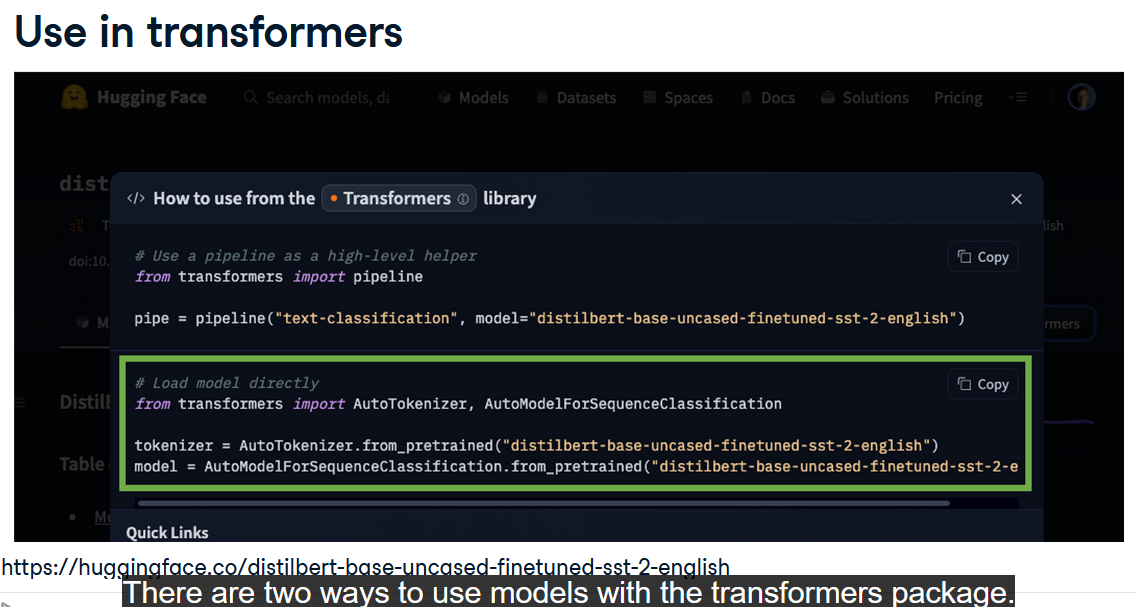

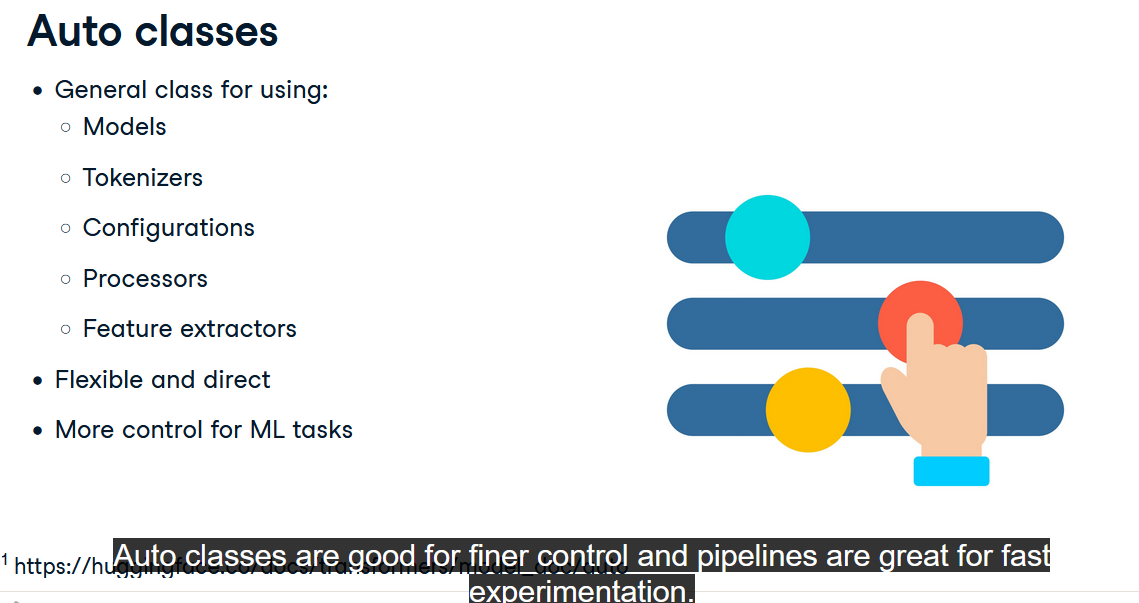

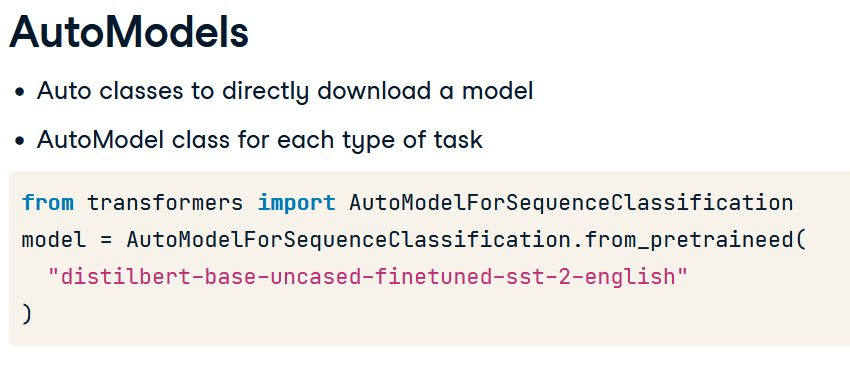

Tokenizers are used to prepare text-based input data for a model.

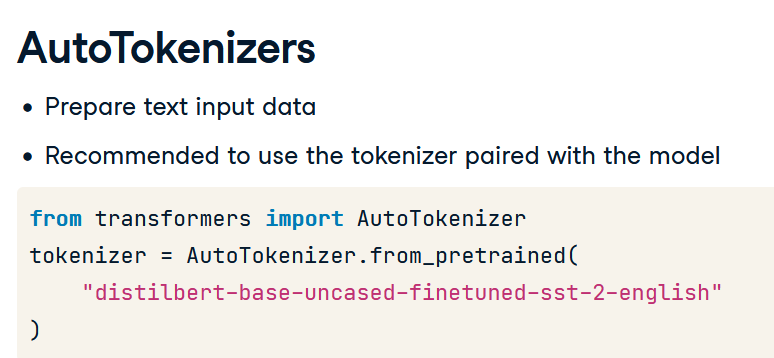

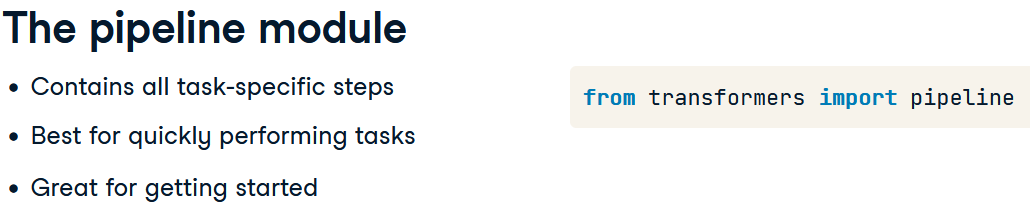

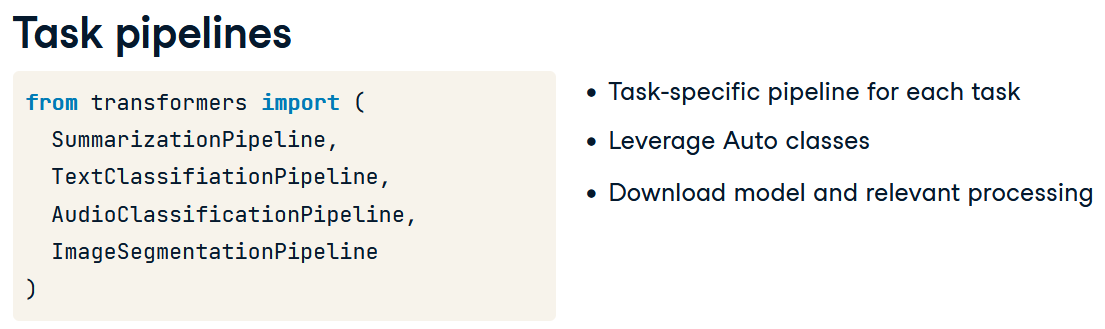

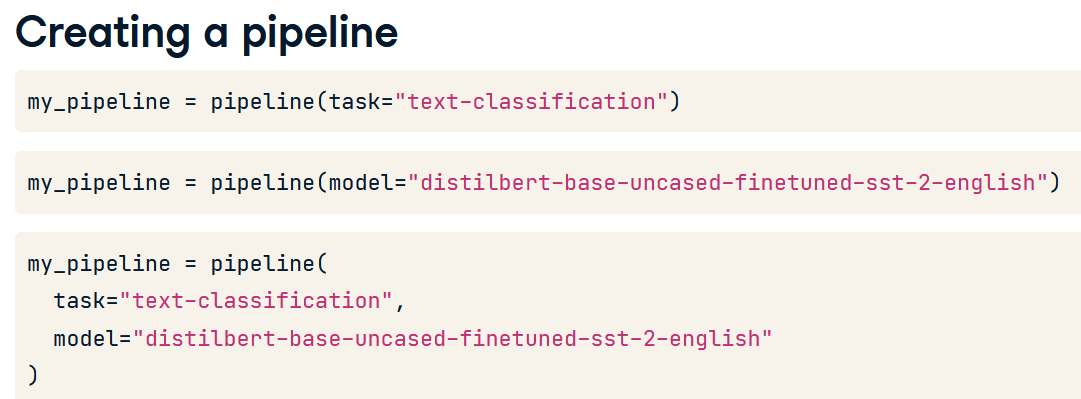

Best practice is to define both task and model

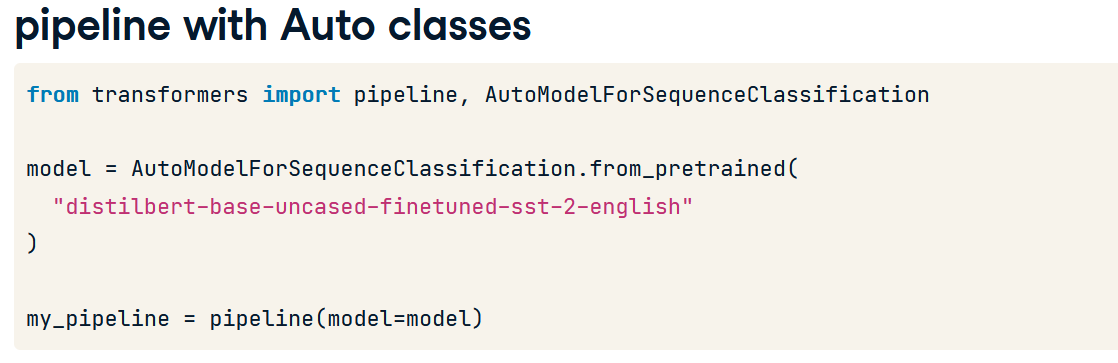

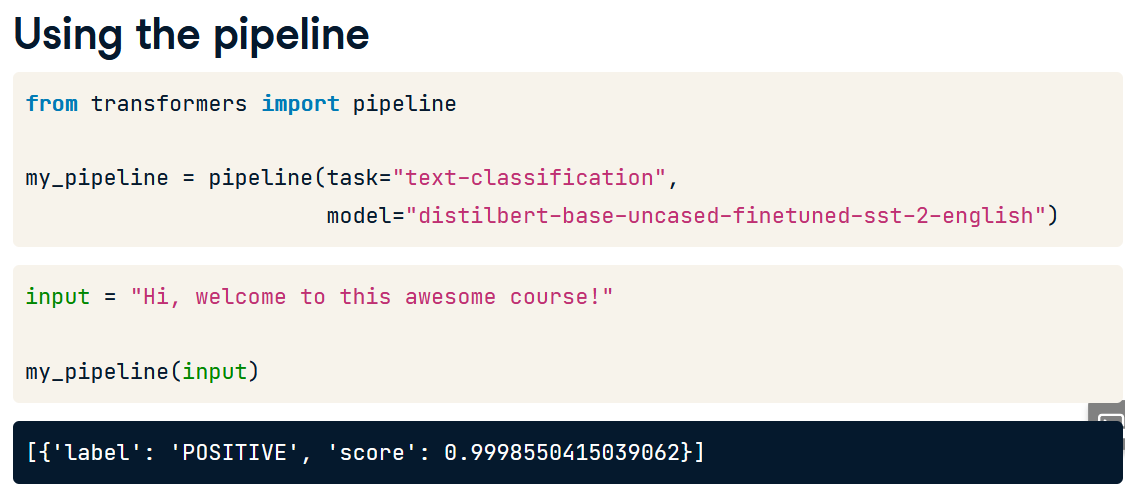

Getting started with pipelines

Hugging Face has an ecosystem of libraries that allow users to leverage tools at different levels. The pipeline module from the transformers library is a great place to get started with performing ML tasks. It removes the requirement for training models, allowing for quicker experimentation and results. It does this by being a wrapper around underlying objects, functions, and processes.

Getting started with pipeline can be done by defining a task or model. This helps with quick experimentation as you become familiar with the library.

Create your first pipelines for sentiment analysis. The input is a sentence string that is already loaded for you.

In [2]:
from transformers import pipeline
input = 'This course is pretty good, I guess.'

# Create the task pipeline
task_pipeline = pipeline(task="sentiment-analysis")

# Create the model pipeline
model_pipeline = pipeline(model="distilbert-base-uncased-finetuned-sst-2-english")

# Predict the sentiment
task_output = task_pipeline(input)
model_output = model_pipeline(input)

print(f"Sentiment from task_pipeline: {task_output[0]['label']}; Sentiment from model_pipeline: {model_output[0]['label']}")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


C:\Users\cmuro\AppData\Roaming\Python\Python312\site-packages\huggingface_hub\file_download.py:159: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\cmuro\.cache\huggingface\hub\models--distilbert-base-uncased-finetuned-sst-2-english. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


Sentiment from task_pipeline: POSITIVE; Sentiment from model_pipeline: POSITIVE


Using AutoClasses

AutoClasses offer more control for machine learning tasks, and they can also be used with pipeline() for quick application. It's a nice balance of control and convenience.

Continue with the sentiment analysis task and combine AutoClasses with the pipeline module.

AutoModelForSequenceClassification and AutoTokenizer from the transformers library have already been imported for you and the input text is saved as input

In [4]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer
# Download the model and tokenizer
model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")

# Create the pipeline
sentimentAnalysis = pipeline(task="sentiment-analysis", model=model, tokenizer=tokenizer)

# Predict the sentiment
output = sentimentAnalysis(input)

print(f"Sentiment using AutoClasses: {output[0]['label']}")

Sentiment using AutoClasses: POSITIVE


Comparing models with the pipeline

One of the great benefits of the pipeline() module is the ease at which you can experiment with different models simply by changing the "model" input. This is a good way to determine which model works best for a particular task or dataset that you are working with.

Experiment with two sentiment analysis models by creating pipelines for each, then using them to predict the sentiment for a sentence.

pipeline from the transformers library is already loaded for you. The example input sentence is saved as input.

In [6]:
from transformers import pipeline
# Create the pipeline
distil_pipeline = pipeline(task="sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

# Predict the sentiment
distil_output = distil_pipeline(input)
print(distil_output)

[{'label': 'POSITIVE', 'score': 0.9998550415039062}]


In [7]:
# Create the pipeline
distil_pipeline = pipeline(task="sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

# Predict the sentiment
distil_output = distil_pipeline(input)

# Create the second pipeline and predict the sentiment
bert_pipeline = pipeline(task="sentiment-analysis", model="kwang123/bert-sentiment-analysis")
bert_output = bert_pipeline(input)

print(f"Bert Output: {bert_output[0]['label']}")
print(f"Distil Output: {distil_output[0]['label']}")

Bert Output: Extremely Positive
Distil Output: POSITIVE


## NLP and tokenization

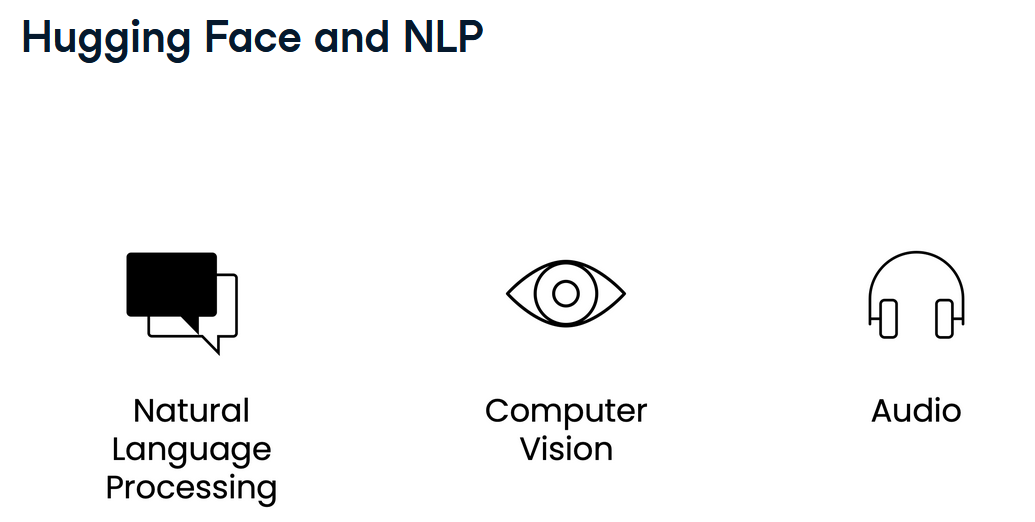

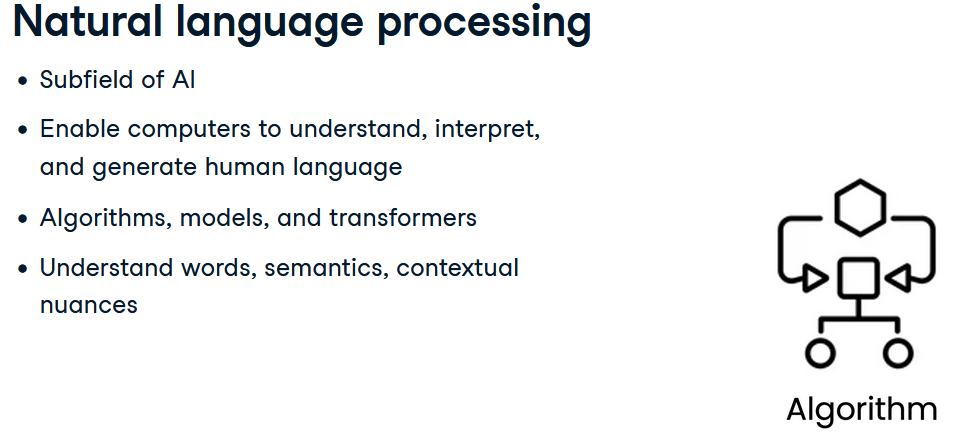

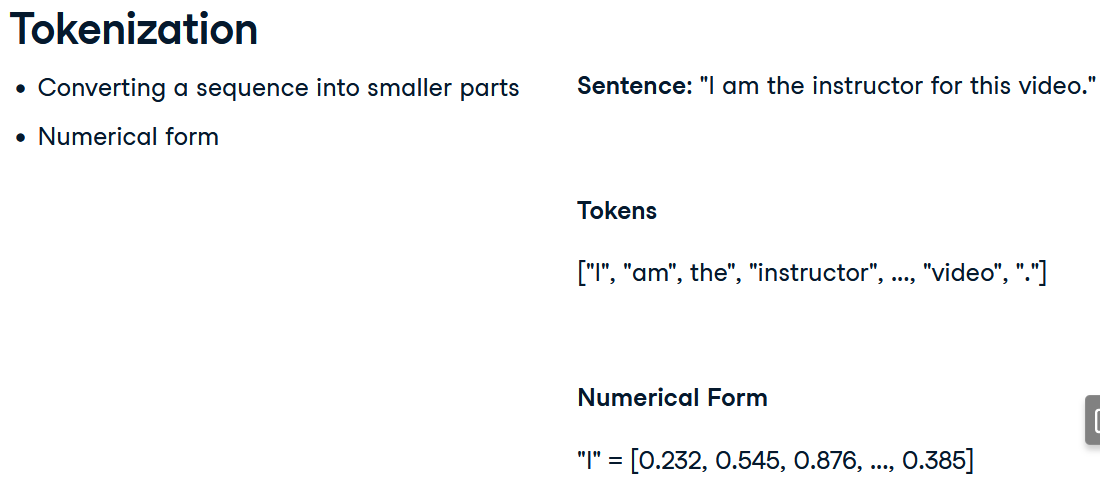

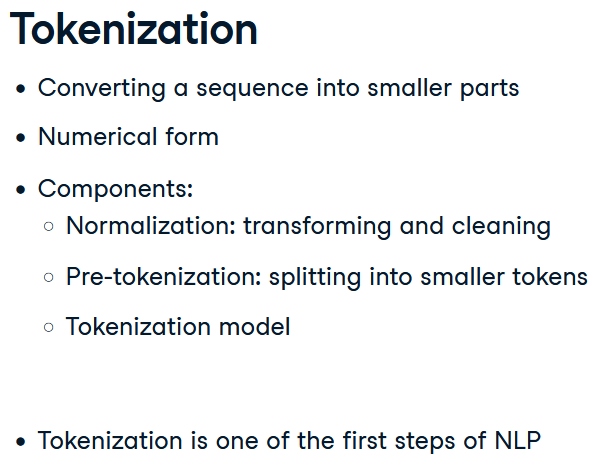

**Normalization** involves:  
* Cleaning text  
* Removing whitespaces  
* Accents  
* Lowercasing  
* Punctuation  
  
**Pretokenization** is the process we often think about when talking about tokenization. It involves:  
* Input text split into smaller tokens  
* Several types of pre-tokenization methods  
* Split by whitespace  
* Difficult with languages that don't use spaces separate words .

Hugging face offers several standar tokenizer models:  
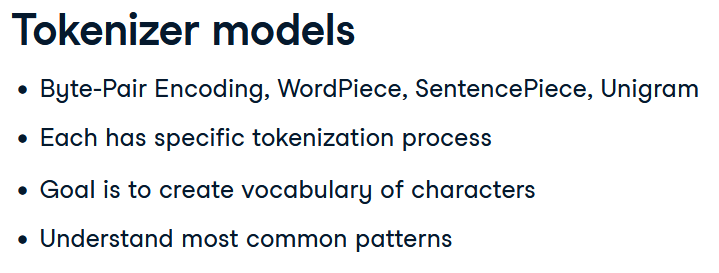  


Each model may have its own specific process for text normalization, pre-tokenization, and tokenization before training.  
Therefore, the best tokenizer for a model is the one it used during training. To get the same tokenizer using during training, we can use the AutoTokenizer class and the .from_trained() method, passing the model name.   
  
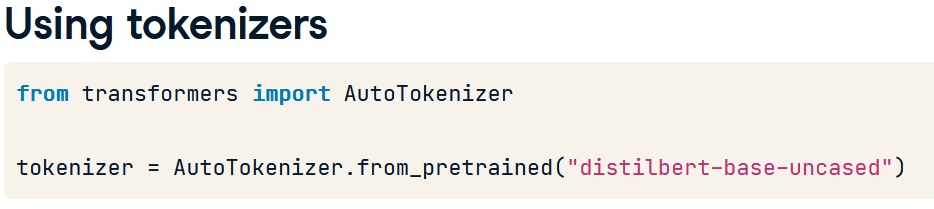    

Using this approach, we have also access to the normalizer methods used by:  
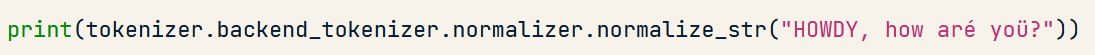 

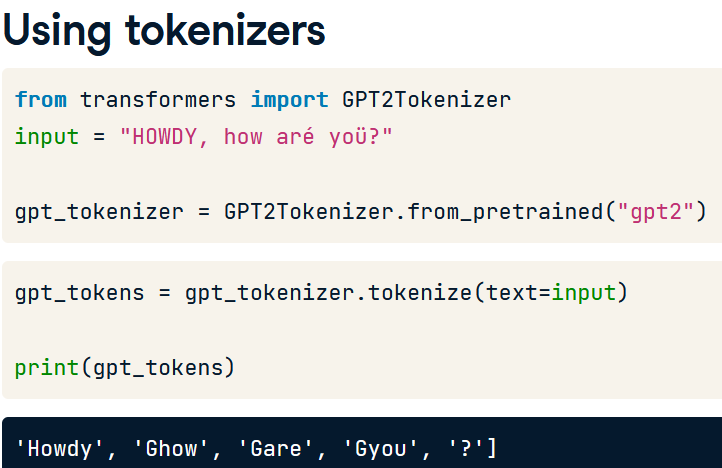

Normalizing text

An important step to performing an NLP task is tokenizing the input text. This makes the text more understandable and manageable for the ML models, or other algorithms.

Before performing tokenization, it's best to run normalization steps, i.e. removing white spaces and accents, lowercasing, and more. Each tokenizer available in Hugging Face uses it's own normalization and tokenization processes.

Let's take a look at what normalization the distilbert-base-uncased tokenizer applies to the input_string, "HOWDY, how aré yoü?".

In [ ]:
input_string = 'HOWDY, how aré yoü?'
# Import the AutoTokenizer
from transformers import AutoTokenizer
input = "Pineapple on pizza is pretty good, I guess."

# Download the tokenizer
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

# Normalize the input string
output = tokenizer.backend_tokenizer.normalizer.normalize_str(input_string)

print(output)

howdy, how are you?


Comparing tokenizer output

Most models in Hugging Face will have an associated tokenizer that will help prepare the input data based on what the model expects. After normalization, the tokenizer will split the input into smaller chunks based on the chosen algorithm. This is known as "pre-tokenization".

Let's explore the different types of pre-tokenization by performing this process with two tokenizers on the same input. We will be using DistilBertTokenizer and GPT2Tokenizer which have already been loaded for you. The input text string, "Pineapple on pizza is pretty good, I guess" is saved as input.

In [9]:
input = "Pineapple on pizza is pretty good, I guess."
from transformers import GPT2Tokenizer, DistilBertTokenizer
# Download the gpt tokenizer
gpt_tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

# Tokenize the input
gpt_tokens = gpt_tokenizer.tokenize(input)

# Repeat for distilbert
distil_tokenizer = DistilBertTokenizer.from_pretrained(
    "distilbert-base-uncased-finetuned-sst-2-english"
)
distil_tokens = distil_tokenizer.tokenize(text=input)

# Compare the output
print(f"GPT tokenizer: {gpt_tokens}")
print(f"DistilBERT tokenizer: {distil_tokens}")



GPT tokenizer: ['P', 'ine', 'apple', 'Ġon', 'Ġpizza', 'Ġis', 'Ġpretty', 'Ġgood', ',', 'ĠI', 'Ġguess', '.']
DistilBERT tokenizer: ['pine', '##apple', 'on', 'pizza', 'is', 'pretty', 'good', ',', 'i', 'guess', '.']


## Text classification

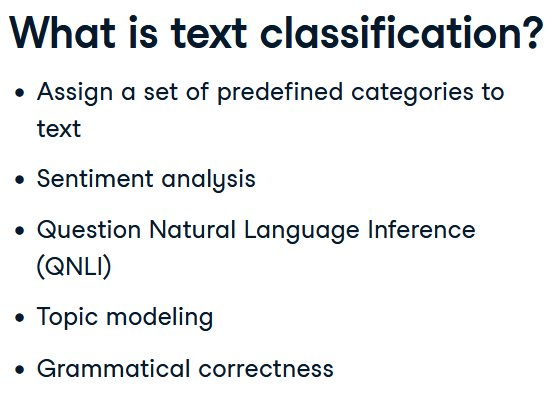

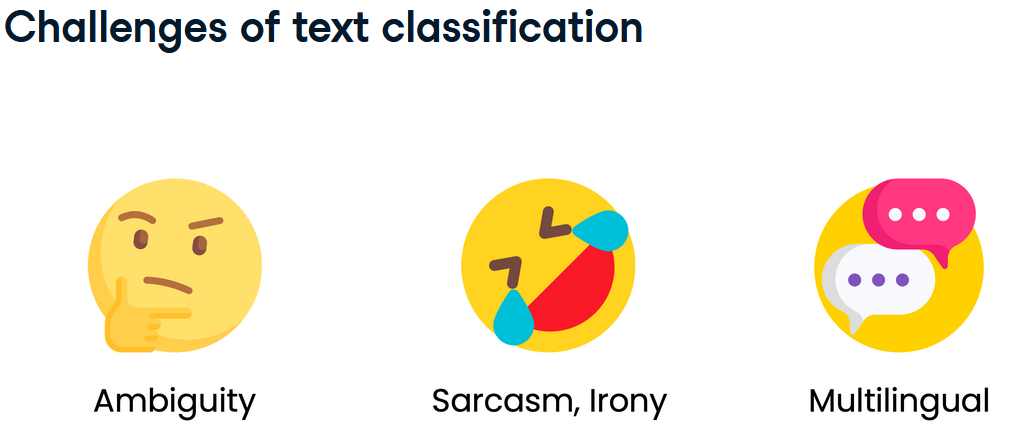

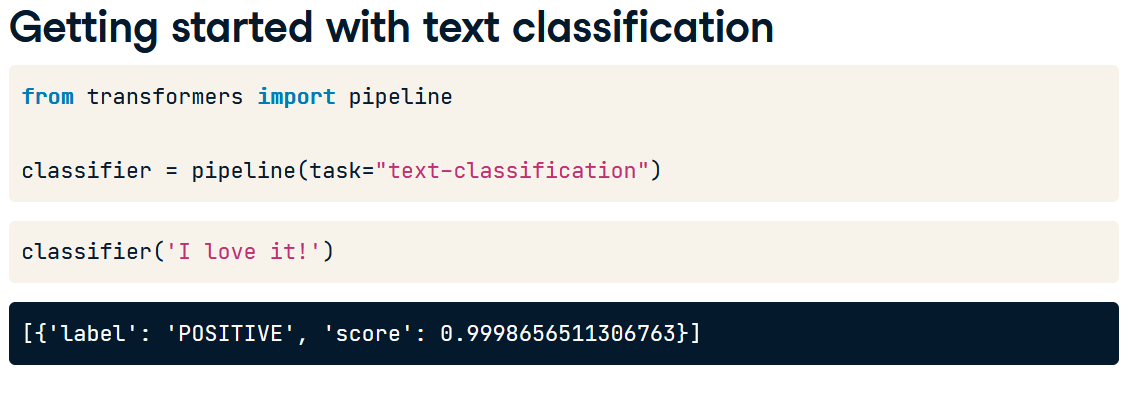

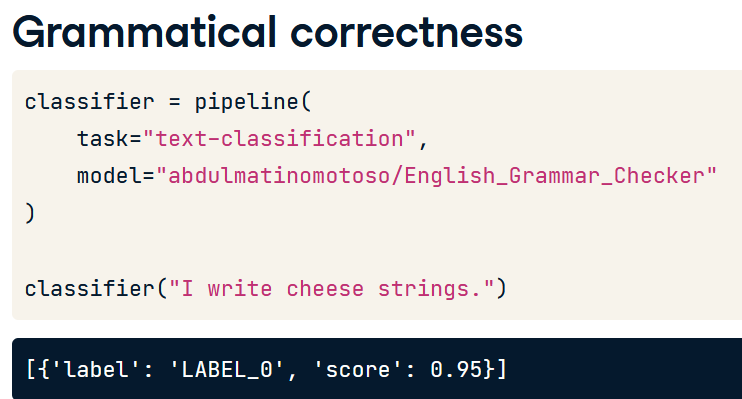

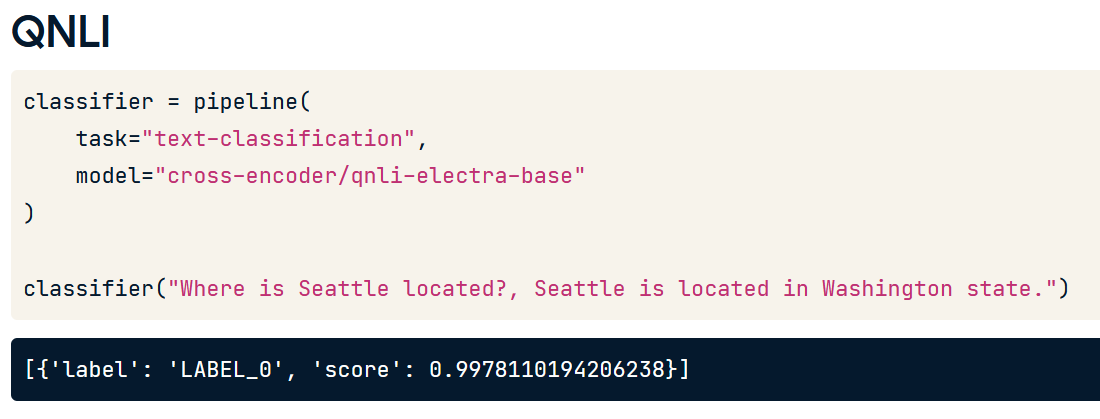

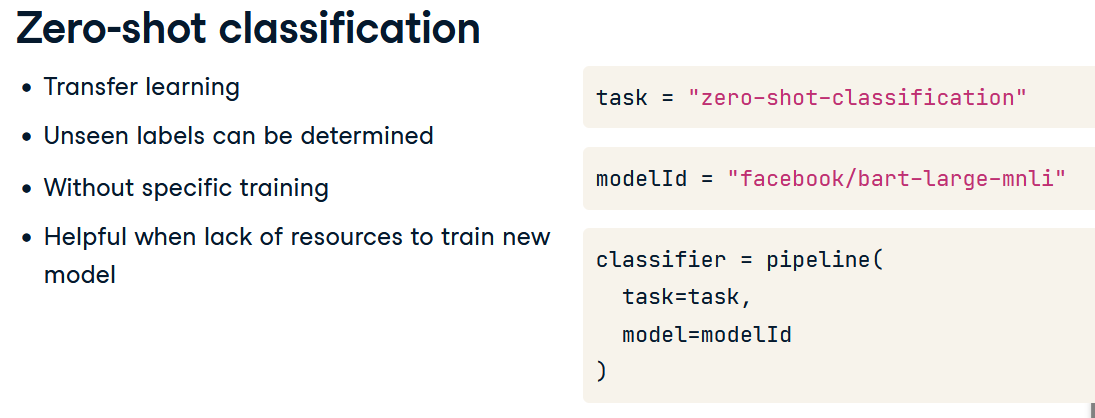

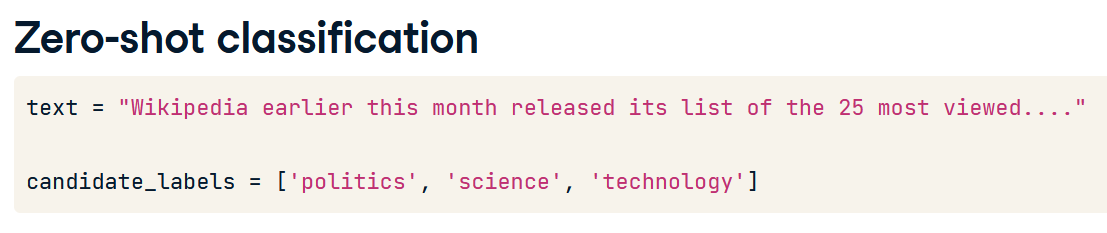

Grammatical correctness

Text classification is the process of labeling an input text into a pre-defined category. This can take the form of sentiment - positive or negative - spam detection - spam or not spam - and even grammatical errors.

Explore the use of a text-classification pipeline for checking an input sentence for grammatical errors.

pipeline from the transformers library is already loaded for you.

In [10]:
from transformers import pipeline
# Create a pipeline
classifier = pipeline(
  task="text-classification", 
  model="abdulmatinomotoso/English_Grammar_Checker"
)

# Predict classification
output = classifier("I will walk dog")

print(output)

[{'label': 'LABEL_0', 'score': 0.9956323504447937}]


Question Natural Language Inference

Another task under the text classification umbrella is Question Natural Language Inference, or QNLI. This determines if a piece of text contains enough information to answer a posed question. This requires the model to perform logical reasoning which are important for Q&A applications.

Performing different tasks with the text-classification pipeline can be done by choosing different models. Each model is trained to predict specific labels and optimized for learning different context within a text.

pipeline from the transformers library is already loaded for you.

In [11]:
from transformers import pipeline
# Create the pipeline
classifier = pipeline(task="text-classification", model="cross-encoder/qnli-electra-base")

# Predict the output
output = classifier("Where is the capital of France?, Brittany is known for their kouign-amann.")

print(output)

[{'label': 'LABEL_0', 'score': 0.005238973069936037}]


Zero-shot classification

Zero-shot classification is the ability for a transformer to predict a label from a new set of classes which it wasn't originally trained to identify. This is possible through its transfer learning capabilities. It can be an extremely valuable tool.

Hugging Face pipeline() also has a zero-shot-classification task. These pipelines require both an input text and candidate labels.

Build a zero-shot classifier to predict the label for the input text, a news headline that has been loaded for you.

pipelines from the transformers library is already loaded for you. Note that we are using our own version of the pipeline function to enable you to learn how to use these functions without having to download the model.

In [12]:
text = 'A 75-million-year-old Gorgosaurus fossil is the first tyrannosaur skeleton ever found with a filled stomach.'
# Build the zero-shot classifier
classifier = pipeline(task="zero-shot-classification", model="facebook/bart-large-mnli")

# Create the list
candidate_labels = ["politics", "science", "sports"]

# Predict the output
output = classifier(text, candidate_labels)

print(f"Top Label: {output['labels'][0]} with score: {output['scores'][0]}")

Top Label: science with score: 0.9030600786209106


## Summarization

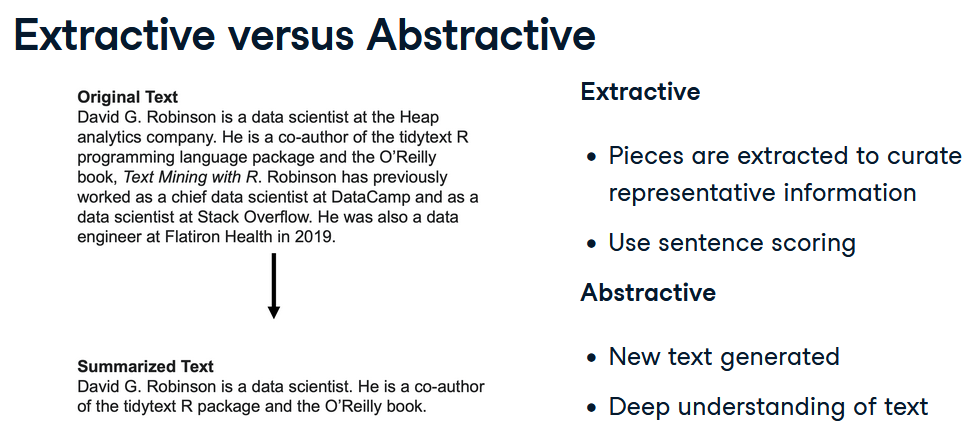

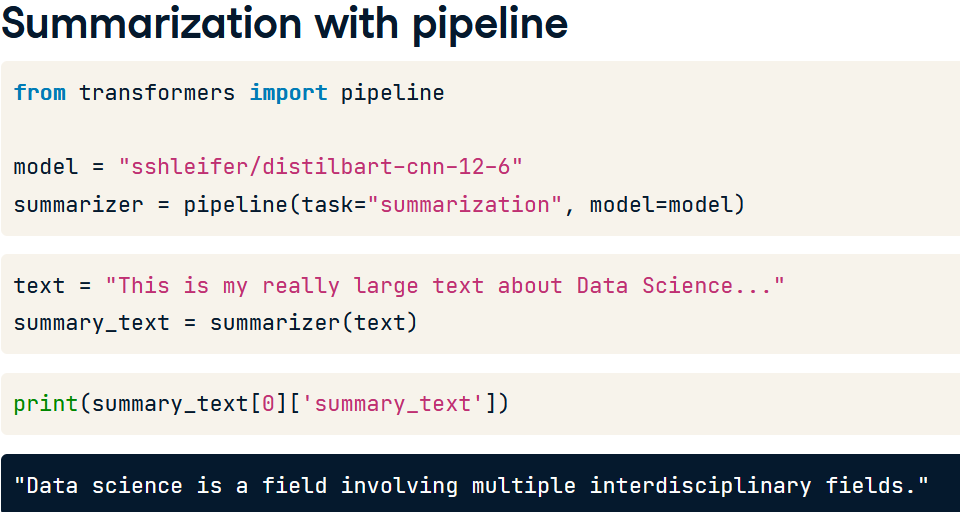

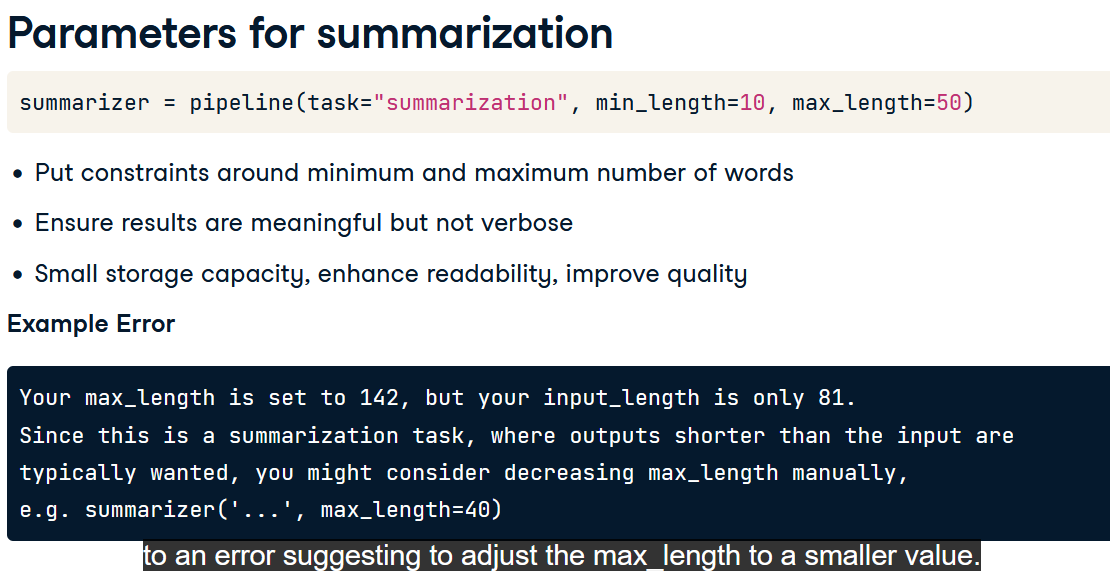

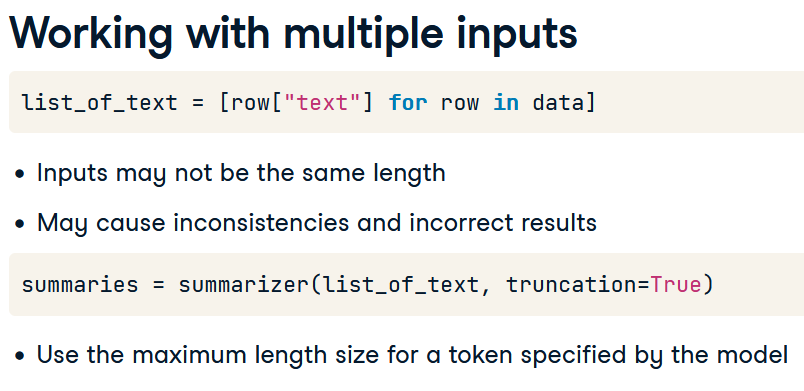

Summarizing long text

Summarization is a useful task for reducing large piece of text into something more manageable. This could be beneficial for multiple reasons like reducing the amount of time a reader needs to spend to obtain the important point of a piece of text.

The Hugging Face pipeline() task, "summarization", builds a s summarization pipeline which is a quick way to perform summarization on a piece of text. You'll do that by creating a new pipeline and using it to summarize a piece of text from a Wikipedia page on Greece.

pipeline from the transformers library and the original_text have already been loaded for you.

In [13]:
original_text = '\nGreece has many islands, with estimates ranging from somewhere around 1,200 to 6,000, depending on the minimum size to take into account. The number of inhabited islands is variously cited as between 166 and 227.\nThe Greek islands are traditionally grouped into the following clusters: the Argo-Saronic Islands in the Saronic Gulf near Athens; the Cyclades, a large but dense collection occupying the central part of the Aegean Sea; the North Aegean islands, a loose grouping off the west coast of Turkey; the Dodecanese, another loose collection in the southeast between Crete and Turkey; the Sporades, a small tight group off the coast of Euboea; and the Ionian Islands, chiefly located to the west of the mainland in the Ionian Sea. Crete with its surrounding islets and Euboea are traditionally excluded from this grouping.\n'

In [14]:
from transformers import pipeline
# Create the summarization pipeline
summarizer = pipeline(task="summarization", model="cnicu/t5-small-booksum")

# Summarize the text
summary_text = summarizer(original_text)

# Compare the length
print(f"Original text length: {len(original_text)}")
print(f"Summary length: {len(summary_text[0]['summary_text'])}")

Original text length: 829
Summary length: 473


Using min_length and max_length

The pipeline() function, has two important parameters: min_length and max_length. These are useful for adjusting the length of the resulting summary text to be short, longer, or within a certain number of words. You might want to do this if there are space constraints (i.e., small storage), to enhance readability, or improve the quality of the summary.

You'll experiment with a short and long summarizer by setting these two parameters to a small range, then a wider range.

pipeline from the transformers library and the original_text have already been loaded for you.

In [15]:
# Create a short summarizer
short_summarizer = pipeline(task="summarization", model="cnicu/t5-small-booksum", min_length=1, max_length=10)

# Summarize the input text
short_summary_text = short_summarizer(original_text)

# Print the short summary
print(short_summary_text[0]["summary_text"])

# Repeat for a long summarizer
long_summarizer = pipeline(task="summarization", model="cnicu/t5-small-booksum", min_length=50, max_length=150)

long_summary_text = long_summarizer(original_text)

# Print the long summary
print(long_summary_text[0]["summary_text"])

Greece has many islands, with estimates ranging
Greece has many islands, with estimates ranging from somewhere around 1,200 to 6,000 depending on the minimum size to take into account. The number of inhabited islands is variously cited as between 166 and 227. The Greek islands are traditionally grouped into the following clusters: the Argo-Saronic Islands in the Saronic Gulf near Athens; the Cyclades, a large but dense collection occupying the central part of the Aegean Sea; the North Aegesan islands, an loose group


Summarizing several inputs

Often times, you'll be working on projects where summarization will occur over an entire dataset or list of items, not just a single piece of text. Fortunately, this can be done by passing in a list of text items. This will return a list of summarized texts.

You'll build a final summarization pipeline and use it to summarize a list of text items from the wiki dataset.

pipeline from the transformers library and the dataset wiki have already been loaded for you.

In [16]:
# Create the list
text_to_summarize = [w["text"] for w in wiki]

# Create the pipeline
summarizer = pipeline("summarization", model="cnicu/t5-small-booksum", min_length=20, max_length=50)

# Summarize each item in the list
summaries = summarizer(text_to_summarize[:3], truncation=True)

# Create for-loop to print each summary
for i in range(0,3):
  print(f"Summary {i+1}: {summaries[i]['summary_text']}")

NameError: name 'wiki' is not defined

## Processing and classifying images

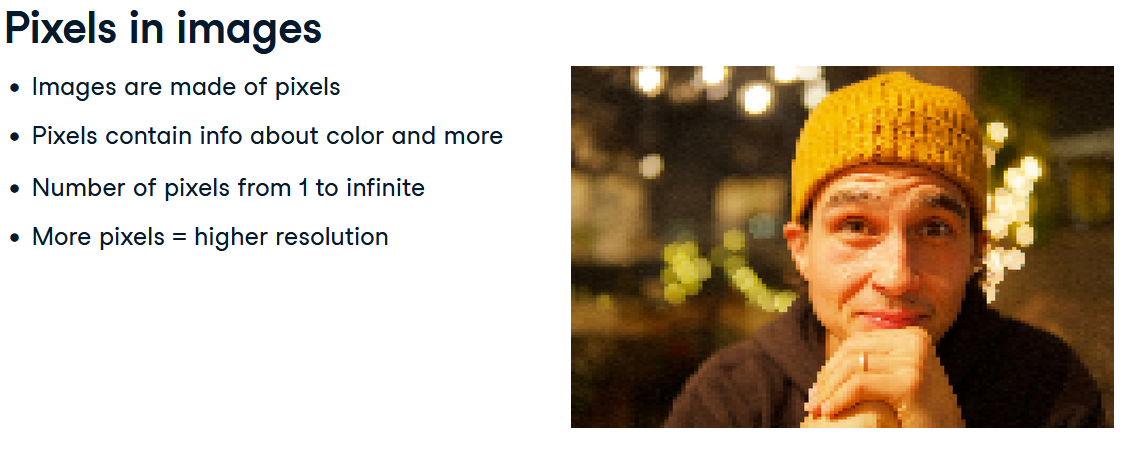

The information stored within pixels, similar to words within a sentence, are the basis for image analysis, processing, and ML tasks. 

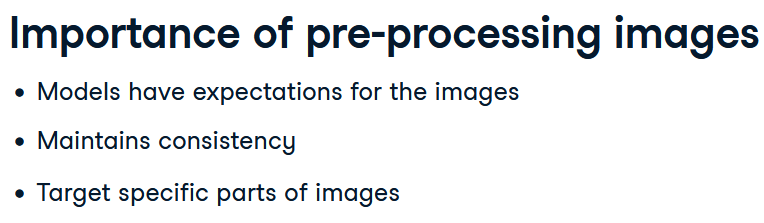

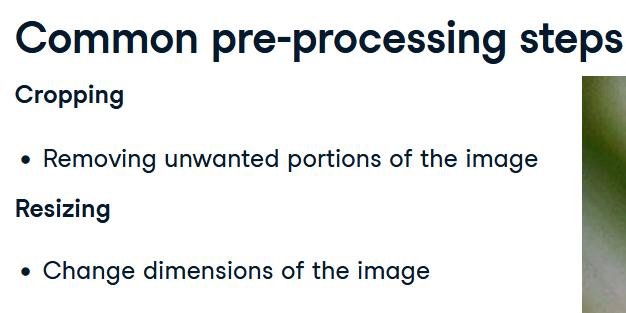

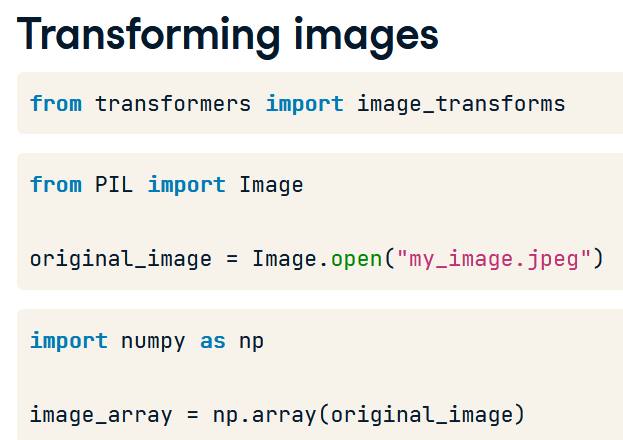

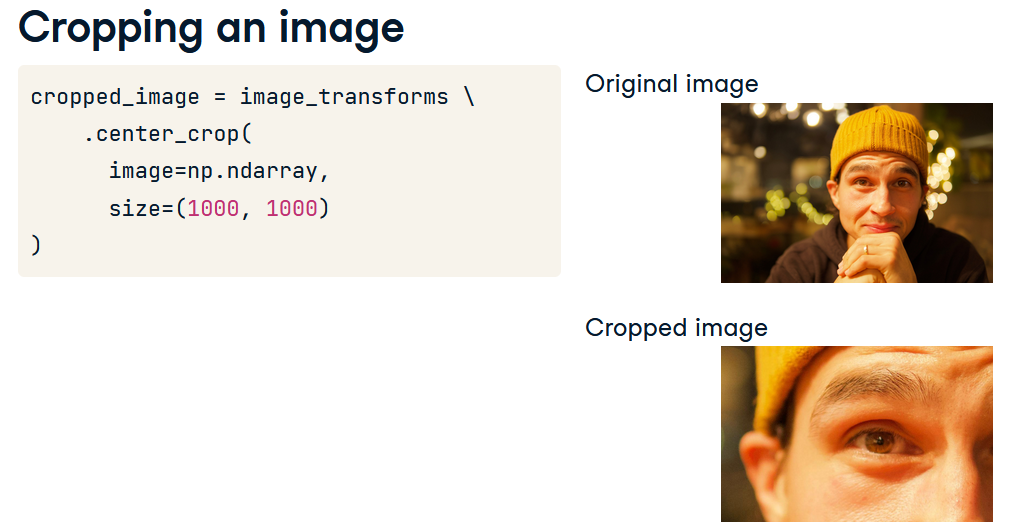

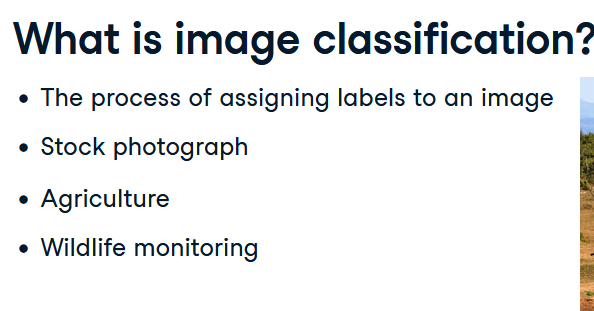

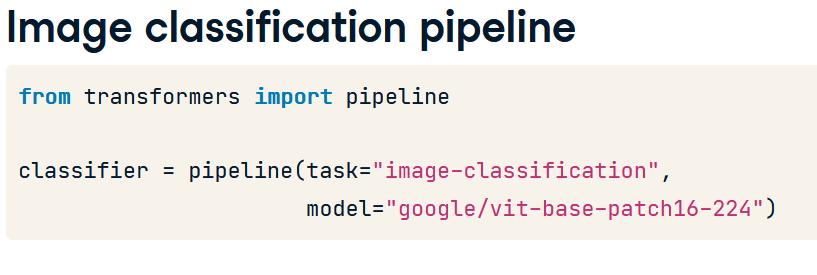

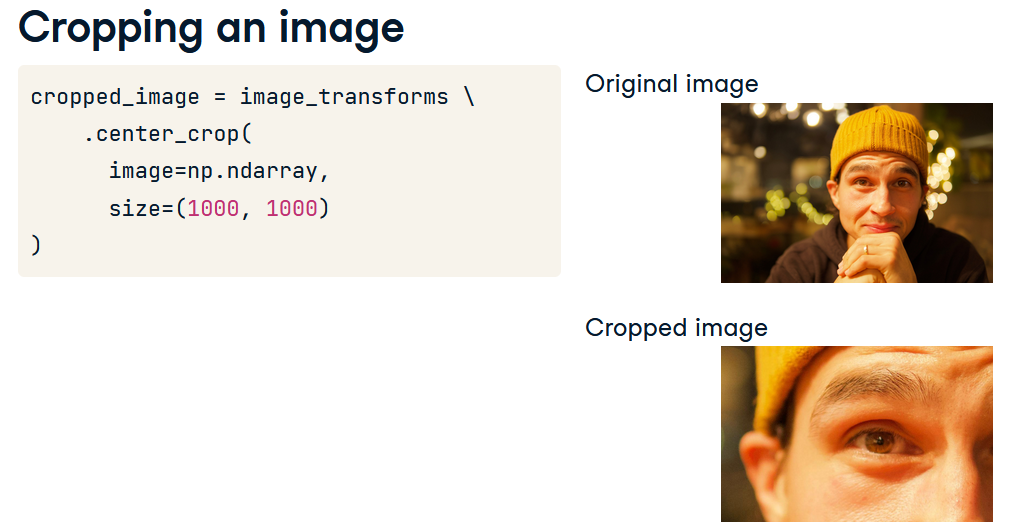

# OpenAI API

In [ ]:
import OpenAI
client = OpenAI(api_key="<OPENAI_API_TOKEN>")

response = client.chat.completions.create(
    model="gpt-4o-mini",
    # Write your prompt
    messages=[{"role": "user", "content": "Simply and concisely, explain why learning about the OpenAI API is important for developers."}],
    max_tokens=200
)

print(response.choices[0].message.content)

ModuleNotFoundError: No module named 'OpenAI'

OpenAI has different access points for users called endpoints.

Endpoints - They are API access point designed for specific interactions.  
Users make requests for different services to different API endpoints.
End points may also requiere authentication before accesing services.
API authentication is usually in the form.

It is important to note that many APIs, have costs associated with using their services.  
For OpenAi, it depends on the:  
* Model
* Larger outputs + inputs = Greater Cost  

In Python we use the openai library.  

In [ ]:
from openai import OpenAI
client = OpenAI(api_key="ENTER YOUR KEY HERE")

# Creating a request to the chats completions  
response = client.chat.completions.create(model = 'gpt-4o-mini',
                                       messages=[{"role":"user","content":"What is the OpenAI API?"}])
print(response.choices[0].message.content)

In [0]:
client = OpenAI(api_key="<OPENAI_API_TOKEN>")

prompt="""Replace car with plane and adjust phrase:
A car is a vehicle that is typically powered by an internal combustion engine or an electric motor. It has four wheels, and is designed to carry passengers and/or cargo on roads or highways. Cars have become a ubiquitous part of modern society, and are used for a wide variety of purposes, such as commuting, travel, and transportation of goods. Cars are often associated with freedom, independence, and mobility."""

# Create a request to the Chat Completions endpoint
response = client.chat.completions.create(
  model='gpt-4o-mini',
  messages=[{"role":"user","content":prompt}],
  max_tokens=100
)

# Extract and print the response text
print(response.choices[0].message.content)

In [ ]:
client = OpenAI(api_key="<OPENAI_API_TOKEN>")

prompt="""Summarize the following text into two concise bullet points:
Investment refers to the act of committing money or capital to an enterprise with the expectation of obtaining an added income or profit in return. There are a variety of investment options available, including stocks, bonds, mutual funds, real estate, precious metals, and currencies. Making an investment decision requires careful analysis, assessment of risk, and evaluation of potential rewards. Good investments have the ability to produce high returns over the long term while minimizing risk. Diversification of investment portfolios reduces risk exposure. Investment can be a valuable tool for building wealth, generating income, and achieving financial security. It is important to be diligent and informed when investing to avoid losses."""

# Create a request to the Chat Completions endpoint
response = client.chat.completions.create(
  model="gpt-4o-mini",
  max_tokens=400,
  messages=[{"role":"user","content":prompt}],
  temperature=0
)

print(response.choices[0].message.content)

In [ ]:
client = OpenAI(api_key="<OPENAI_API_TOKEN>")

prompt = """ Create an slogan for a new restaurante """


# Create a request to the Chat Completions endpoint
response = client.chat.completions.create(
  model="gpt-4o-mini",
  messages = [{'role':"user","content":prompt}],
  max_tokens=100
)

print(response.choices[0].message.content)

In [ ]:
client = OpenAI(api_key="<OPENAI_API_TOKEN>")

# Define a multi-line prompt to classify sentiment
prompt = """ 
 Classify the sentiment of the following statements as either negative, positive, or neutral:

    * Unbelievably good!
    * Shoes fell apart on the second use.
    * The shoes look nice, but they aren't very comfortable.
    * Can't wait to show them off!
 """

# Create a request to the Chat Completions endpoint
response = client.chat.completions.create(
  model="gpt-4o-mini",
  messages=[{"role":"user","content":prompt}],
  max_tokens=100
)

print(response.choices[0].message.content)

### Sentiment analysis and classification  

In [ ]:
client = OpenAI(api_key="<OPENAI_API_TOKEN>")

# Define a prompt for the categorization
prompt = "Categorize the following companies: Apple, Microsoft, Saudi Aramco, Alphabet, Amazon, Berkshire Hathaway, NVIDIA, Meta, Tesla, LVMH"

# Create a request to the Chat Completions endpoint
response = client.chat.completions.create(
  model="gpt-4o-mini",
  messages=[{"role":"user","content":prompt}],
  max_tokens=100,
  temperature=0.5
)

print(response.choices[0].message.content)

### Chat completions with chatgpt

**System** : Controls assistanst behavior, it allows us to specify a message to control the behavior of the assitant. For e.g. for assitant chatbot, we could provide a system message that the assitant is a polite and helpful customer service asistant.

In [ ]:
client = OpenAI(api_key="<OPENAI_API_TOKEN>")

# Create a request to the Chat Completions endpoint
response = client.chat.completions.create(
  model="gpt-4o-mini",
  max_tokens=150,
  messages=[
    {"role": "system",
     "content": "You are a helpful data science tutor."},
    {"role":"user",
    "content":"What is the difference between a for loop and a while loop?"}
  ]
)

# Extract and print the assistant's text response
print(response.choices[0].message.content)

In [ ]:
client = OpenAI(api_key="<OPENAI_API_TOKEN>")

instruction = """Explain what this Python code does in one sentence:
import numpy as np

heights_dict = {"Mark": 1.76, "Steve": 1.88, "Adnan": 1.73}
heights = heights_dict.values()
print(np.mean(heights))
"""

# Create a request to the Chat Completions endpoint
response = client.chat.completions.create(
  model="gpt-4o-mini",
  messages=[{"role":"user","content":instruction}],
  max_tokens=100
)

print(response.choices[0].message.content)

### Multi-turn chat completions with GPT

In-context learning

For more complex use cases, the models lack the understanding or context of the problem to provide a suitable response from a prompt. In these cases, you need to provide examples to the model for it to learn from, so-called in-context learning.

In this exercise, you'll improve on a Python programming tutor built on the OpenAI API by providing an example that the model can learn from.

Here is an example of a user and assistant message you can use, but feel free to try out your own:

    User → Explain what the min() Python function does.
    Assistant → The min() function returns the smallest item from an iterable.


In [ ]:
client = OpenAI(api_key="<OPENAI_API_TOKEN>")

response = client.chat.completions.create(
   model="gpt-4o-mini",
   # Add a user and assistant message for in-context learning
   messages=[
     {"role": "system", "content": "You are a helpful Python programming tutor."},
     {"role": "user", "content": "Explain what the type() function does."},
    {"role":"assistant","content":"The min() function returns the smallest item from an iterable."}
   ]
)

print(response.choices[0].message.content)

In [ ]:
client = OpenAI(api_key="<OPENAI_API_TOKEN>")

messages = [{"role": "system", "content": "You are a helpful math tutor."}]
user_msgs = ["Explain what pi is.", "Summarize this in two bullet points."]

for q in user_msgs:
    print("User: ", q)
    
    # Create a dictionary for the user message from q and append to messages
    user_dict = {"role": "user", "content": q}
    messages.append(user_dict)
    
    # Create the API request
    response = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=messages,
        max_tokens=100
    )
    
    # Convert the assistant's message to a dict and append to messages
    assistant_dict = {"role": "assistant", "content": response.choices[0].message.content}
    messages.append(assistant_dict)
    print("Assistant: ", response.choices[0].message.content, "\n")

### Text moderation

In [ ]:
# Interpreting the resuls
print(response.model_dump())
print(response.results[0].category_scores)

Larger numbers -> greater certainty of violation

In [ ]:
client = OpenAI(api_key="<OPENAI_API_TOKEN>")

# Create a request to the Moderation endpoint
response = client.moderations.create(model="text-moderation-latest",
input = "My favorite book is To Kill a Mockingbird.")

# Print the category scores
print(response.results[0].category_scores)

### Speech-to-Text Transcription with Whisper

In [ ]:
client = OpenAI(api_key="<OPENAI_API_TOKEN>")

# Open the openai-audio.mp3 file
audio_file = open("openai-audio.mp3", "rb")

# Create a transcript from the audio file
response = client.audio.transcriptions.create(model="whisper-1", file=audio_file)

# Extract and print the transcript text
print(response.text)

In [ ]:
client = OpenAI(api_key="<OPENAI_API_TOKEN>")

# Open the audio.m4a file
audio_file= open("audio.m4a","rb")

# Create a transcript from the audio file
response = client.audio.transcriptions.create(model='whisper-1',file=audio_file)

print(response.text)

![image](image.png)


![image](image.png)


![image](image.png)


![image](image.png)


In [ ]:
client = OpenAI(api_key="<OPENAI_API_TOKEN>")

# Open the audio.m4a file
audio_file = open("audio.m4a", "rb")

# Create a translation from the audio file
response = client.audio.translations.create(model="whisper-1", file=audio_file)

# Extract and print the translated text
print(response.text)

![image](image.png)


In [ ]:
client = OpenAI(api_key="<OPENAI_API_TOKEN>")

# Open the audio.wav file
audio_file = open("audio.wav","rb")

# Write an appropriate prompt to help the model
prompt = "The audio is about to a recent World Bank report"

# Create a translation from the audio file
response = client.audio.translations.create(model="whisper-1",
file=audio_file,prompt=prompt)

print(response.text)

### Combining models

![image](image.png)


![image](image.png)


![image](image.png)


In [ ]:
client = OpenAI(api_key="<OPENAI_API_TOKEN>")

# Open the audio.wav file
audio_file = open("audio.wav", "rb")

# Create a transcription request using audio_file
audio_response = client.audio.transcriptions.create(model="whisper-1",file=audio_file)

# Create a request to the API to identify the language spoken
chat_response = client.chat.completions.create(model="gpt-4o-mini",messages=[{"role":"user","content":audio_response.text}])
print(chat_response)

![image](image.png)


In [ ]:
client = OpenAI(api_key="<OPENAI_API_TOKEN>")

# Open the datacamp-q2-roadmap.mp3 file
audio_file = open("datacamp-q2-roadmap.mp3","rb")

# Create a transcription request using audio_file
audio_response = client.audio.transcriptions.create(model="whisper-1",
file=audio_file)

transcript = audio_response.text

prompt = "Summarize into concise bullet points the following: " + transcript 

# Create a request to the API to summarize the transcript into bullet points
chat_response = client.chat.completions.create(model="gpt-4o-mini",
messages = [{"role":"user","content":prompt}])
print(chat_response.choices[0].message.content)

# Reshaping data with pandas


This notes were taken from the excellent course "Reshaping data with pandas" in DataCamp.  
It includes from the concepts of wide and large formats of dataframes and how convert from one to another with distinc functions of pandas. It also covers how to manipulate json documents to convert them in dataframes.  

Excepting for the json files, the datasets are in the file "fifa_players.xlsx" (which is here in the same repository of my github), in the different 17 sheets. The data for the exercises are no avaliable to download so I had to compile it by hand in spreadsheets.

## Wide and large formats
Shape refers to the way in which data is organized in rows and columns.  
A dataset is commonly organized in rows and columns.  

The wide format has no repeated records, but this could lead to missing values. This format is preferred to do simple statistics, such as calculating the mean, or imputing missing values.  

The long format is usually seen as the standard for a tidy dataset. There are multiple rows, for one for each feature.  

In a broad sense, reshaping data is transforming a data structure to adjust it for our analysis. This could involve something as simple as transposing the data so columns become rows and rows become columns.  

We define reshaping data as converting data from wide to long format an viceversa.  

To transform from wide to long format we use the pandas methods .melt() and .wide_to_long()  

To transform from long to wide format we use the pandas methods .pivot() and .pivot_table()

In [1]:
import pandas as pd
fifa_players=pd.DataFrame({"name":["Lionel Messi","Cristiano Ronald","Neymar da Silva","Jan Oblak","Eden Hazard"],"age":[32,34,27,26,28],"height":[170,187,175,188,175],"weight":[72,83,68,87,74],"nationality":["Argentina","Portugal","Brazil","Slovenia","Belgium"],"club":["FC Barcelona","Juventus","Paris Saint-Germain","Atlético Madrid","Real Madrid"]})

Explore your dataset and reshape it using basic steps, such as setting different indices, filtering columns and flipping the DataFrame.

In [2]:
print(fifa_players)

               name  age  height  weight nationality                 club
0      Lionel Messi   32     170      72   Argentina         FC Barcelona
1  Cristiano Ronald   34     187      83    Portugal             Juventus
2   Neymar da Silva   27     175      68      Brazil  Paris Saint-Germain
3         Jan Oblak   26     188      87    Slovenia      Atlético Madrid
4       Eden Hazard   28     175      74     Belgium          Real Madrid


In [3]:
# Set name as index
fifa_transpose = fifa_players.set_index("name")

# Print fifa_transpose
print(fifa_transpose)

                  age  height  weight nationality                 club
name                                                                  
Lionel Messi       32     170      72   Argentina         FC Barcelona
Cristiano Ronald   34     187      83    Portugal             Juventus
Neymar da Silva    27     175      68      Brazil  Paris Saint-Germain
Jan Oblak          26     188      87    Slovenia      Atlético Madrid
Eden Hazard        28     175      74     Belgium          Real Madrid


In [4]:
# Modify the DataFrame to keep only height and weight columns
fifa_transpose = fifa_players.set_index('name')[['height','weight']]

# Print fifa_transpose
print(fifa_transpose)

                  height  weight
name                            
Lionel Messi         170      72
Cristiano Ronald     187      83
Neymar da Silva      175      68
Jan Oblak            188      87
Eden Hazard          175      74


In [5]:
# Change the DataFrame so rows become columns and vice versa
fifa_transpose = fifa_players.set_index('name')[['height', 'weight']].transpose()

# Print fifa_transpose
print(fifa_transpose)

name    Lionel Messi  Cristiano Ronald  Neymar da Silva  Jan Oblak  Eden Hazard
height           170               187              175        188          175
weight            72                83               68         87           74


## Reshaping using the pivot method
The long format is usually the most suitable to store and clean a dataset.  

The pivot method allows us to reshape the data from a long to wide format. It takes three arguments  
df.pivot(index=,columns=,values=)  
By ommitting the values argument we extend the pivot method to all the column values.  

Passing only index and columns arguments to the pivot method will work in most of the cases.  

In [22]:
import pandas as pd
fifa_players=pd.DataFrame({"name":["L. Messi","Cristiano Ronaldo","L. Messi","Cristiano Ronaldo","L. Messi","Cristiano Ronaldo"],"movement":["shooting","shooting","passing","passing","dribbling","dribbling"],"overall":[93,92,92,82,96,89],"attacking":[70,89,92,83,88,84]})

In [23]:
print(fifa_players)

                name   movement  overall  attacking
0           L. Messi   shooting       93         70
1  Cristiano Ronaldo   shooting       92         89
2           L. Messi    passing       92         92
3  Cristiano Ronaldo    passing       82         83
4           L. Messi  dribbling       96         88
5  Cristiano Ronaldo  dribbling       89         84


In [7]:
# Pivot fifa_players to get overall scores indexed by name and identified by movement
fifa_overall = fifa_players.pivot(index="name", columns="movement", values="overall")

# Print fifa_overall
print(fifa_overall)

movement           dribbling  passing  shooting
name                                           
Cristiano Ronaldo         89       82        92
L. Messi                  96       92        93


In [8]:
# Pivot fifa_players to get attacking scores indexed by name and identified by movement
fifa_attacking = fifa_players.pivot(index="name", columns="movement", values="attacking")

# Print fifa_attacking
print(fifa_attacking)

movement           dribbling  passing  shooting
name                                           
Cristiano Ronaldo         84       83        89
L. Messi                  88       92        70


In [9]:
# Use the pivot method to get overall scores indexed by movement and identified by name
fifa_names = fifa_players.pivot(index="movement",columns="name",values="overall")

# Print fifa_names
print(fifa_names)

name       Cristiano Ronaldo  L. Messi
movement                              
dribbling                 89        96
passing                   82        92
shooting                  92        93


In [10]:
# Pivot fifa_players to get overall and attacking scores indexed by name and identified by movement
fifa_over_attack = fifa_players.pivot(index="name", 
                                     columns="movement", 
                                     values=["overall", "attacking"])

# Print fifa_over_attack
print(fifa_over_attack)

                    overall                  attacking                 
movement          dribbling passing shooting dribbling passing shooting
name                                                                   
Cristiano Ronaldo        89      82       92        84      83       89
L. Messi                 96      92       93        88      92       70


In [11]:
# Use pivot method to get all the scores index by name and identified by movement
fifa_all = fifa_players.pivot(index="name",columns="movement")

# Print fifa_over_attack
print(fifa_all)

                    overall                  attacking                 
movement          dribbling passing shooting dribbling passing shooting
name                                                                   
Cristiano Ronaldo        89      82       92        84      83       89
L. Messi                 96      92       93        88      92       70


You suspect that there are different scores for the same index and column values. You remember that using the .pivot() method for all the columns does not work in that case. 

In [12]:
# Drop the fifth row to delete all repeated rows
fifa_no_rep = fifa_players.drop(4, axis=0)

# Pivot fifa players to get all scores by name and movement
fifa_pivot = fifa_no_rep.pivot(index="name",columns="movement") 

# Print fifa_pivot
print(fifa_pivot)  

                    overall                  attacking                 
movement          dribbling passing shooting dribbling passing shooting
name                                                                   
Cristiano Ronaldo      89.0    82.0     92.0      84.0    83.0     89.0
L. Messi                NaN    92.0     93.0       NaN    92.0     70.0


## Pivot table
Now we are going the use .pivot_table() method.  

The simple pivot method has the limitation that the index/column pair must be unique. It can not aggregate values.  

A pivot table is a data frame that contains statistics that summarizes the data of a larger data frame.  

This method takes several arguments  
df.pivot_table(index=,columns=,values=,aggfunc="",margins=True/False)  
Pivot tables can have multileves indexes.  

Then, when:
The dataframe have more than one value for each index/column pair  
Do you need to have a multi-index in your resulting pivoted data frame  
You need summary statistics for a large data frame  
Use .pivot_table()!

In [13]:
# Discard the fifth row to delete all repeated rows
fifa_drop = fifa_players.drop(4,axis=0)

# Use pivot method to get all scores by name and movement
fifa_pivot = fifa_drop.pivot(index="name",columns="movement") 

# Print fifa_pivot
print(fifa_pivot)  

# Use pivot table to get all scores by name and movement
fifa_pivot_table = fifa_players.pivot_table(index="name", 
                                     columns="movement", 
                                     aggfunc="mean")
# Print fifa_pivot_table
print(fifa_pivot_table)

                    overall                  attacking                 
movement          dribbling passing shooting dribbling passing shooting
name                                                                   
Cristiano Ronaldo      89.0    82.0     92.0      84.0    83.0     89.0
L. Messi                NaN    92.0     93.0       NaN    92.0     70.0
                  attacking                    overall                 
movement          dribbling passing shooting dribbling passing shooting
name                                                                   
Cristiano Ronaldo        84      83       89        89      82       92
L. Messi                 88      92       70        96      92       93


Now, it's time to continue working on the fifa_players exploration. Your next task is to examine the characteristics of players belonging to different teams.

Particularly, you are interested in players from two big rival teams: Barcelona and Real Madrid.

You decide that .pivot_table() is the best tool to get your results since it's an easy way to generate a report. Also, it allows you to define aggregation functions and work with multiple indices.

In [14]:
import pandas as pd
import openpyxl
fifa_players=pd.read_excel("fifa_players.xlsx")

In [15]:
# Use pivot table to display mean age of players by club and nationality 
mean_age_fifa = fifa_players.pivot_table(index="nationality", 
                                  columns=['club'], 
                                  values='age', 
                                  aggfunc='mean')

# Print mean_age_fifa
print(mean_age_fifa)

club         FC Barcelona
nationality              
Brazil          24.222222
Croatia         32.000000
France          24.875000
Germany         28.000000
Uruguay         26.000000


In [16]:
# Use pivot table to display max height of any player by club and nationality
tall_players_fifa = fifa_players.pivot_table(index="nationality", 
                                     columns="club", 
                                      values="height", 
                                      aggfunc="max")

# Print tall_players_fifa
print(tall_players_fifa)

club         FC Barcelona
nationality              
Brazil                190
Croatia               184
France                191
Germany               187
Uruguay               182


In [17]:
# Use pivot table to show the count of players by club and nationality and the total count
players_country = fifa_players.pivot_table(index="nationality", 
                                    columns="club", 
                                    values="name", 
                                    aggfunc="count", 
                                    margins=True)

# Print players_country
print(players_country)

club         FC Barcelona  All
nationality                   
Brazil                  9    9
Croatia                 2    2
France                  8    8
Germany                 2    2
Uruguay                 2    2
All                    23   23


You will continue your exploration of characteristics of players in fifa_players belonging to two teams: FC Barcelona and Real Madrid. As your last task, you are interested in exploring the maximum height and weight separated by teams and nationality. You will also compare two years, 2000 and 2010.

You have two columns that you want to set as an index, so you will need to use pivot_table().

The fifa_players dataset is available for you. It contains data about the club, nationality, height, weight, and year of the players playing for each team.

In [22]:
import pandas as pd
fifa_players=pd.read_excel("fifa_players.xlsx",'Sheet2')
print(fifa_players)

           club nationality  year  height  weight
0  FC Barcelona     Germany  2000     187      85
1  FC Barcelona     Germany  2010     189      87
2   Real Madrid     Croatia  2000     172      66
3   Real Madrid     Croatia  2010     173      68
4   Real Madrid     Germany  2000     183      76
5   Real Madrid     Germany  2010     185      77
6  FC Barcelona     Croatia  2000     184      78
7  FC Barcelona     Croatia  2010     185      76


In [23]:
# Define a pivot table to get the characteristic by nationality and club
fifa_mean = fifa_players.pivot_table(index=["nationality","club"],columns="year")

# Print fifa_mean
print(fifa_mean)

                         height      weight     
year                       2000 2010   2000 2010
nationality club                                
Croatia     FC Barcelona    184  185     78   76
            Real Madrid     172  173     66   68
Germany     FC Barcelona    187  189     85   87
            Real Madrid     183  185     76   77


In [24]:
# Set the appropriate argument to show the maximum values
fifa_mean = fifa_players.pivot_table(index=['nationality', 'club'], 
                                     columns='year', 
                                     aggfunc="max")

# Print fifa_mean
print(fifa_mean)

                         height      weight     
year                       2000 2010   2000 2010
nationality club                                
Croatia     FC Barcelona    184  185     78   76
            Real Madrid     172  173     66   68
Germany     FC Barcelona    187  189     85   87
            Real Madrid     183  185     76   77


In [25]:
# Set the argument to get the maximum for each row and column
fifa_mean = fifa_players.pivot_table(index=['nationality', 'club'], 
                                     columns='year', 
                                     aggfunc='max', 
                                     margins=True)

# Print fifa_mean
print(fifa_mean)

                         height           weight         
year                       2000 2010  All   2000 2010 All
nationality club                                         
Croatia     FC Barcelona    184  185  185     78   76  78
            Real Madrid     172  173  173     66   68  68
Germany     FC Barcelona    187  189  189     85   87  87
            Real Madrid     183  185  185     76   77  77
All                         187  189  189     85   87  87


## Reshaping with melt
We want to perform from wide to long.    
For some tasks to perform analytics or plot graphs we need the data in the long format.  

Pandas provides the melt function with the arguments  
df.melt(id_vars=["",""],value_vars=,var_name="var_we_analyze",value_name=)  
In var_name the columns which we want to melt.    

In [27]:
import pandas as pd
books_gothic=pd.read_excel("fifa_players.xlsx","Sheet3")

In [28]:
# Melt books_gothic using the title column as identifier 
gothic_melted = books_gothic.melt(id_vars="title")

# Print gothic_melted
print(gothic_melted)

                         title      variable              value
0            Wuthering Heights       authors       Emily Bronte
1                Frankeinstein       authors       Mary Shelley
2   The Picture of Dorian Gray       authors        Oscar Wilde
3            Wuthering Heights     num_pages                322
4                Frankeinstein     num_pages                189
5   The Picture of Dorian Gray     num_pages                187
6            Wuthering Heights  rating_count       rating_count
7                Frankeinstein  rating_count               2452
8   The Picture of Dorian Gray  rating_count               3342
9            Wuthering Heights        rating               3.85
10               Frankeinstein        rating               4.31
11  The Picture of Dorian Gray        rating               4.15
12           Wuthering Heights     publisher      Penguin Books
13               Frankeinstein     publisher  Kaplan Publishing
14  The Picture of Dorian Gray     publi

In [29]:
# Melt books_gothic using the title, authors, and publisher columns as identifier
gothic_melted_new = books_gothic.melt(id_vars=['title','authors','publisher'])

# Print gothic_melted_new
print(gothic_melted_new)

                        title       authors  ...      variable         value
0           Wuthering Heights  Emily Bronte  ...     num_pages           322
1               Frankeinstein  Mary Shelley  ...     num_pages           189
2  The Picture of Dorian Gray   Oscar Wilde  ...     num_pages           187
3           Wuthering Heights  Emily Bronte  ...  rating_count  rating_count
4               Frankeinstein  Mary Shelley  ...  rating_count          2452
5  The Picture of Dorian Gray   Oscar Wilde  ...  rating_count          3342
6           Wuthering Heights  Emily Bronte  ...        rating          3.85
7               Frankeinstein  Mary Shelley  ...        rating          4.31
8  The Picture of Dorian Gray   Oscar Wilde  ...        rating          4.15

[9 rows x 5 columns]


Your first exploration of the books_gothic dataset was successful. Now, your next task is to perform a more detailed analysis. You need to reshape your DataFrame again. This time, you don't want to use all of your variables.

To that aim, you will melt your DataFrame, taking several approaches using different columns as identifiers and value variables.

The same books_gothic dataset you used before is available for you. It contains data about the title, author, number_pages, rating, rating_count, and publisher of each book. Make sure to examine it in the console!

In [30]:
# Melt publisher column using title and authors as identifiers
publisher_melted = books_gothic.melt(id_vars=["title","authors"], 
                                     value_vars="publisher")

# Print publisher_melted
print(publisher_melted)

                        title       authors   variable              value
0           Wuthering Heights  Emily Bronte  publisher      Penguin Books
1               Frankeinstein  Mary Shelley  publisher  Kaplan Publishing
2  The Picture of Dorian Gray   Oscar Wilde  publisher            Pearson


In [31]:
# Melt rating and rating_count columns using the title as identifier
rating_melted = books_gothic.melt(id_vars="title", 
                                  value_vars=["rating","rating_count"])

# Print rating_melted
print(rating_melted)

                        title      variable         value
0           Wuthering Heights        rating          3.85
1               Frankeinstein        rating          4.31
2  The Picture of Dorian Gray        rating          4.15
3           Wuthering Heights  rating_count  rating_count
4               Frankeinstein  rating_count          2452
5  The Picture of Dorian Gray  rating_count          3342


In [32]:
# Melt rating and rating_count columns using title and authors as identifier
books_melted = books_gothic.melt(id_vars=["title","authors"], 
                                 value_vars=["rating",'rating_count'])

# Print books_melted
print(books_melted)

                        title       authors      variable         value
0           Wuthering Heights  Emily Bronte        rating          3.85
1               Frankeinstein  Mary Shelley        rating          4.31
2  The Picture of Dorian Gray   Oscar Wilde        rating          4.15
3           Wuthering Heights  Emily Bronte  rating_count  rating_count
4               Frankeinstein  Mary Shelley  rating_count          2452
5  The Picture of Dorian Gray   Oscar Wilde  rating_count          3342


You are satisfied with the way you reshaped the books_gothic DataFrame, however, you would like to finish your work by naming the newly-created columns. This will help you clarify what the variables and values are.

You remember that .melt() allows you to do that. In order to achieve your goal, you will reshape your DataFrame in three steps.

In [33]:
# Melt the rating and rating_count using title, authors and publisher as identifiers
books_ratings = books_gothic.melt(id_vars=['title','authors','publisher'], 
                                  value_vars=["rating","rating_count"])

# Print books_ratings
print(books_ratings)

                        title       authors  ...      variable         value
0           Wuthering Heights  Emily Bronte  ...        rating          3.85
1               Frankeinstein  Mary Shelley  ...        rating          4.31
2  The Picture of Dorian Gray   Oscar Wilde  ...        rating          4.15
3           Wuthering Heights  Emily Bronte  ...  rating_count  rating_count
4               Frankeinstein  Mary Shelley  ...  rating_count          2452
5  The Picture of Dorian Gray   Oscar Wilde  ...  rating_count          3342

[6 rows x 5 columns]


In [34]:
# Assign the name number to the new column containing the values
books_ratings = books_gothic.melt(id_vars=['title', 'authors', 'publisher'], 
                                  value_vars=['rating', 'rating_count'], 
                                  var_name='feature', 
                                  value_name="number")

# Print books_ratings
print(books_ratings)

                        title       authors  ...       feature        number
0           Wuthering Heights  Emily Bronte  ...        rating          3.85
1               Frankeinstein  Mary Shelley  ...        rating          4.31
2  The Picture of Dorian Gray   Oscar Wilde  ...        rating          4.15
3           Wuthering Heights  Emily Bronte  ...  rating_count  rating_count
4               Frankeinstein  Mary Shelley  ...  rating_count          2452
5  The Picture of Dorian Gray   Oscar Wilde  ...  rating_count          3342

[6 rows x 5 columns]


## Wide to long function  
We can also use the wide_to_long() function.  
 
The format of this panda funtion is  
pd.wide_to_long(df,stubnames=["",""],i=,j=,sep='_',suffix='\w+').  

i is the index, and j tells pandas how we want to name the column that contains the suffix or the end of the wide columns. The suffix is needed when the name of the columns ends in a word.  

In [2]:
import pandas as pd
golden_age=pd.read_excel("fifa_players.xlsx","Sheet4")

In [4]:
# Reshape wide to long using title as index and version as new name, and extracting isbn prefix 
isbn_long = pd.wide_to_long(golden_age, 
                    stubnames="isbn", 
                    i="title", 
                    j="version")

# Print isbn_long
print(isbn_long)

                                       authors  ...           isbn
title             version                       ...               
The Great Gatsby  13       F. Scott Fitzgerald  ...   978060098919
The Short Stories 13          Ernest Hemingway  ...  9780684837864
To the Lighthouse 13            Virginia Woolf  ...  9780156030472
The Great Gatsby  10       F. Scott Fitzgerald  ...     1572702567
The Short Stories 10          Ernest Hemingway  ...      684837862
To the Lighthouse 10            Virginia Woolf  ...      156030470

[6 rows x 4 columns]


In [5]:
# Reshape wide to long using title and authors as index and version as new name, and prefix as wide column prefix
prefix_long = pd.wide_to_long(golden_age, 
                      stubnames="prefix", 
                      i=["title", "authors"], 
                      j="version")

# Print prefix_long
print(prefix_long)

                                                      isbn13  ...  prefix
title             authors             version                 ...        
The Great Gatsby  F. Scott Fitzgerald 13        978060098919  ...     978
                                      10        978060098919  ...       1
The Short Stories Ernest Hemingway    13       9780684837864  ...     978
                                      10       9780684837864  ...       0
To the Lighthouse Virginia Woolf      13       9780156030472  ...     978
                                      10       9780156030472  ...       0

[6 rows x 3 columns]


In [6]:
# Reshape wide to long using title and authors as index and version as new name, and prefix and isbn as wide column prefixes
all_long = pd.wide_to_long(golden_age, 
                   stubnames=["isbn","prefix"], 
                   i=["title","authors"], 
                   j="version")

# Print all_long
print(all_long)

                                                        isbn  prefix
title             authors             version                       
The Great Gatsby  F. Scott Fitzgerald 13        978060098919     978
                                      10          1572702567       1
The Short Stories Ernest Hemingway    13       9780684837864     978
                                      10           684837862       0
To the Lighthouse Virginia Woolf      13       9780156030472     978
                                      10           156030470       0


You explored the dataset books_brown and it needs reshaping. Again, you identified several columns to use as unique IDs and realized something different about the columns to group. Their name starts with a prefix, but this time, you identified a suffix and a separation element.

The books_brown dataset is available for you. It contains the title, author, and data about language_code, language_name, publisher_code, and publisher_name of each book. 

In [8]:
import pandas as pd
books_brown=pd.read_excel("fifa_players.xlsx","Sheet5")

In [10]:
print(books_brown.head())

                  title     author  ...  publisher_code publisher_name
0     The Da Vinci Code  Dan Brown  ...              12   Random House
1       Angels & Demons  Dan Brown  ...              34   Pocket Books
2  La fortaleza digital  Dan Brown  ...              43        Umbriel

[3 rows x 6 columns]


In [9]:
# Reshape using author and title as index, code as new name and getting the prefix language and publisher
the_code_long = pd.wide_to_long(books_brown, 
                                stubnames=["language","publisher"], 
                                j="code", 
                                i=["author","title"])

# Print the_code_long
print(the_code_long)

Empty DataFrame
Columns: [language_code, publisher_name, language_name, publisher_code, language, publisher]
Index: []


In [11]:
# Specify underscore as the character that separates the variable names
the_code_long = pd.wide_to_long(books_brown, 
                                stubnames=['language', 'publisher'], 
                                i=['author', 'title'], 
                                j='code',sep="_")

# Print the_code_long
print(the_code_long)

Empty DataFrame
Columns: [language_code, publisher_name, language_name, publisher_code, language, publisher]
Index: []


In [12]:
# Specify that wide columns have a suffix containing words
the_code_long = pd.wide_to_long(books_brown, 
                                stubnames=['language', 'publisher'], 
                                i=['author', 'title'], 
                                j='code', 
                                sep='_', 
                                suffix='\w+')

# Print the_code_long
print(the_code_long)

                                    language     publisher
author    title                code                       
Dan Brown The Da Vinci Code    code        0            12
                               name  english  Random House
          Angels & Demons      code        0            34
                               name  english  Pocket Books
          La fortaleza digital code       84            43
                               name  spanish       Umbriel


You would like to do an analysis for fun. You will analyze another book dataset, this time with the Hunger Games series.

You explored the dataset books_hunger before reshaping it, but something was not right. The index of the DataFrame contains the title of the books. You know that you cannot reshape it in this format. If you do, you will lose valuable data, the title, so you'll need to make some changes before transforming the DataFrame.

The books_hunger dataset is available for you. It contains the title, and data about language, publication date, publication number, and page number of each book.

In [1]:
import pandas as pd
books_hunger=pd.read_excel("fifa_players.xlsx","Sheet6")

In [2]:
# Modify books_hunger by resetting the index without dropping it
books_hunger.reset_index(drop=False, inplace=True)

# Reshape using title and language as index, feature as new name, publication and page as prefix separated by space and ending in a word
publication_features = pd.wide_to_long(books_hunger, 
                                       stubnames=["publication","page"], 
                                       i=["title","language"], 
                                       j="feature", 
                                       sep=" ", 
                                       suffix='\w+')

# Print publication_features
print(publication_features)

                                         index          publication   page
title                  language feature                                   
Los Juegos del Hambre  Spanish  date         0            5/25/2010    NaN
                                number       0                    2  374.0
Catching Fire          English  date         1            5/25/2012    NaN
                                number       1                    6  391.0
Il canto della rivolta Italian  date         2  2015-08-06 00:00:00    NaN
                                number       2                    4  390.0


## Working with string columns
We are going to learn methods to reshape string columns.  
In pandas, we acces to the methods for strings through the str attribute.  
To split a column:  
df.str.split("separator")  

We could also access one of the resulting elements. We use the get method from the str attributte
.str.get(). We can use the expand argument with expand=True to create return a new data frame wit two columns, one for each split element.   

This allows to assign the split elements to columns in the original dataframe  
df[['newcol1','newcol2']]=df['col'].str.split("sep",expand=True)  
This is useful because we can drop the original column, and after that transform the new dataframe  
df.drop('col',axis=1,inplace=True)  
pd.wide_to_long(df,stubnames=['',''],i=['newcol1','newcol2'],j=)


In [15]:
import pandas as pd
books_dys=pd.read_excel("fifa_players.xlsx","Sheet7")
author_list=['Ray Bradbury', 'George Orwell', 'Aldous Huxley']

In [16]:
books_dys=books_dys.set_index("title")

In [17]:
books_dys

,year,num_pages,average_rating,ratings_count
title,,,,
Fahrenheit 451-1953,1953,186,4.10,23244
1984-1949,1949,268,4.31,14353
Brave New World-1932,1932,123,4.30,23535


You plan to work on a dataset about dystopian fiction books.

But first, you need to do some string manipulations. You realize that the DataFrame index contains data about the title and the release year. You can't find a column with the author of the book, so you decide to pre-define a list of the writers. Then, you want to delete the year and replace it with the author.

You decide that splitting the index and then concatenating it with the list is the best way to do it.

The books_dys dataset and author_list are available 

In [14]:
# Split the index of books_dys by the hyphen 
books_dys.index = books_dys.index.str.split("-")

# Print books_dys
print(books_dys)

       year  num_pages  average_rating  ratings_count
title                                                
NaN    1953        186            4.10          23244
NaN    1949        268            4.31          14353
NaN    1932        123            4.30          23535


In [20]:
# Now that you've split the index, get the first element and assign it to the index of books_dys.
# Get the first element after splitting the index of books_dys
books_dys=pd.read_excel("fifa_players.xlsx","Sheet7")
author_list=['Ray Bradbury', 'George Orwell', 'Aldous Huxley']
books_dys=books_dys.set_index("title")
###
###
# Split by the hyphen the index of books_dys
books_dys.index = books_dys.index.str.split('-').str.get(0)

# Concatenate the index with the list author_list separated by a hyphen
books_dys.index = books_dys.index.str.cat(author_list, sep="-")

# Print books_dys
print(books_dys)

                               year  num_pages  average_rating  ratings_count
title                                                                        
Fahrenheit 451-Ray Bradbury    1953        186            4.10          23244
1984-George Orwell             1949        268            4.31          14353
Brave New World-Aldous Huxley  1932        123            4.30          23535


For your next task, you need to get an appropriate dataset containing ratings for all the Harry Potter books. You gathered data from Goodreads as well as from Amazon.

You realized that you need a long format, but the dataset hp_books is in a wide format. You want to melt the data, but first, you need to manipulate some of the string columns.

The full title is divided into two columns. The authors column contains info about the writer and the illustrator.

Ratings for the Harry Potter books are in the DataFrame hp_books

In [2]:
import pandas as pd
hp_books=pd.read_excel("fifa_players.xlsx","Sheet8")
print(hp_books)

          title                  subtitle  ... goodreads  amazon
0  Harry Potter     the Half-Blood Prince  ...      4.57    4.52
1  Harry Potter  the Order of the Phoenix  ...      4.49    4.44
2  Harry Potter    the Chamber of Secrets  ...      4.42    4.37
3  Harry Potter  the Prisiones of Azkaban  ...      4.56    4.51
4  Harry Potter       The Deathly Hallows  ...      4.42    4.37
5  Harry Potter      the Sorcerer's Stone  ...      4.47    4.42
6  Harry Potter        the Goblet of Fire  ...      4.56    4.51

[7 rows x 5 columns]


In [3]:
# Concatenate the title and subtitle separated by "and" surrounded by spaces
hp_books['full_title'] = hp_books['title'].str.cat(hp_books['subtitle'], sep =" and ") 

# Split the authors into writer and illustrator columns
hp_books[['writer', 'illustrator']] = hp_books['authors'].str.split('/', expand=True)

# Melt goodreads and amazon columns into a single column
hp_melt = hp_books.melt(id_vars=['full_title',"writer"], 
                        var_name="source", 
                        value_vars=["goodreads","amazon"], 
                        value_name="rating")

# Print hp_melt
print(hp_melt)

                                   full_title        writer     source  rating
0      Harry Potter and the Half-Blood Prince  J.K. Rowling  goodreads    4.57
1   Harry Potter and the Order of the Phoenix  J.K. Rowling  goodreads    4.49
2     Harry Potter and the Chamber of Secrets  J.K. Rowling  goodreads    4.42
3   Harry Potter and the Prisiones of Azkaban  J.K. Rowling  goodreads    4.56
4        Harry Potter and The Deathly Hallows  J.K. Rowling  goodreads    4.42
5       Harry Potter and the Sorcerer's Stone  J.K. Rowling  goodreads    4.47
6         Harry Potter and the Goblet of Fire  J.K. Rowling  goodreads    4.56
7      Harry Potter and the Half-Blood Prince  J.K. Rowling     amazon    4.52
8   Harry Potter and the Order of the Phoenix  J.K. Rowling     amazon    4.44
9     Harry Potter and the Chamber of Secrets  J.K. Rowling     amazon    4.37
10  Harry Potter and the Prisiones of Azkaban  J.K. Rowling     amazon    4.51
11       Harry Potter and The Deathly Hallows  J.K. 

Analyze data about Arthur Conan Doyle's books.

You realize your dataset, books_sh, needs reshaping. You notice there are columns that can be grouped using a prefix. You identify the columns to use as unique IDs. However, some of these columns contain strings. They need some manipulation before applying a wide to long transformation. You decide some of the strings need splitting to make the DataFrame cleaner.

The books_sh dataset is available for you. It contains the title, and data about version, number_pages, and number_ratings of each book.

In [4]:
import pandas as pd
books_sh=pd.read_excel("fifa_players.xlsx","Sheet9")

In [5]:
# Split main_title by a colon and assign it to two columns named title and subtitle 
books_sh[['title', 'subtitle']] = books_sh['main_title'].str.split(':', expand=True)

# Split version by a space and assign the second element to the column named volume
books_sh['volume'] = books_sh['version'].str.split(' ').str.get(1)

# Drop the main_title and version columns modifying books_sh
books_sh.drop(["main_title", "version"], axis=1, inplace=True)

# Print books_sh
print(books_sh)

   number_pages  number_ratings  ...              subtitle volume
0          1059           24087  ...   The Complete Novels      I
1           709           26794  ...   The Complete Novels     II
2           334            2184  ...               Memoirs      I
3           238            1884  ...               Memoirs     II

[4 rows x 5 columns]


## Stacking dataframes
Pandas has methods designed to work with multi-level indexes dataframes.  
A multiindex allows to store and manipulate multidimensional data in simple dataframes.  

There are several ways to create a multi-level index.  
The simplest one is with the .set_index(['',''],inplace=True)  

Another option is to use the method from_arrays().  
We define a list of lists  
new_array=[[],[]]  
where each element represent one index. Then  
df.index=pd.MultiIndex.from_arrays(new_array,names=['',''])  

We could also define a DataFrame with multi-level indexes on the rows and the columns. The process is very similar.  
index=pd.MultiIndex.from_array([[],[]],names=)  
columns=pd.MultiIndex.from_array([[],[]],names=)  

new_df=pd.DataFrame(data,index=index,columns=columns)  

The .stack() method will reshape the dataframe with a multi-level index by converting into a a stacked form. In other words, stacking means rearringing the innermost column index to become the innermost row index. It has the argument level= . If we don't set the level argument stack will move the last level by default.   

Stack the calls!
First, you explored the dataset churn and realized some information is missing. The dataset contains data about the total number of calls and the minutes spent on the phone by different customers. However, the state and city they live in are not listed.

You predefined an array with that data. You'd like to add it as an index in your DataFrame.

The DataFrame churn is available for you. It contains data about area code, total_day_calls and total_day_minutes.

In [1]:
import pandas as pd
churn=pd.DataFrame({"Area code":[408,408,415,510],"total_day_calls":[116,109,84,67],"total_day_minutes":[204,287,84,50]})
new_index = [['California', 'California', 'New York', 'Ohio'], 
             ['Los Angeles', 'San Francisco', 'New York', 'Cleveland']]

In [10]:
churn

,Area code,total_day_calls,total_day_minutes
0,408,116,204
1,408,109,287
2,415,84,84
3,510,67,50


In [6]:
# Predefined list to use as index
new_index = [['California', 'California', 'New York', 'Ohio'], 
             ['Los Angeles', 'San Francisco', 'New York', 'Cleveland']]

# Create a multi-level index using predefined new_index
churn_new = pd.MultiIndex.from_arrays(new_index, names=["state", "city"])

# Print churn_new
print(churn_new)

MultiIndex([('California',   'Los Angeles'),
            ('California', 'San Francisco'),
            (  'New York',      'New York'),
            (      'Ohio',     'Cleveland')],
           names=['state', 'city'])


In [3]:
# Create a multi-level index using predefined new_index
churn_new = pd.MultiIndex.from_arrays(new_index, names=['state', 'city'])

# Assign the new index to the churn index
churn.index = churn_new

# Reshape by stacking churn DataFrame
churn_stack = churn.stack()

# Print churn_stack
print(churn_stack)

state       city                            
California  Los Angeles    Area code            408
                           total_day_calls      116
                           total_day_minutes    204
            San Francisco  Area code            408
                           total_day_calls      109
                           total_day_minutes    287
New York    New York       Area code            415
                           total_day_calls       84
                           total_day_minutes     84
Ohio        Cleveland      Area code            510
                           total_day_calls       67
                           total_day_minutes     50
dtype: int64


You are making progress in your customer's project. Now, you need to analyze a new dataset to find differences in the messages and gigabytes (GB) of data the customers use during the daytime and nighttime.

To that aim, you will reshape your dataset churn using different levels. The advantage of your new dataset is that the column indices have names. 

In [6]:
import pandas as pd
churn=pd.read_excel("fifa_players.xlsx","Sheet11")

In [38]:
print(churn)

     time        feature       state           city  value
0     day  text messages  California    Los Angeles     20
1     day  text messages  California  San Francisco     40
2     day  text messages    New York       New York     50
3     day  text messages        Ohio      Cleveland    100
4     day       total GB  California    Los Angeles      5
5     day       total GB  California  San Francisco      5
6     day       total GB    New York       New York      2
7     day       total GB        Ohio      Cleveland      3
8   night  text messages  California    Los Angeles     30
9   night  text messages  California  San Francisco    100
10  night  text messages    New York       New York     20
11  night  text messages        Ohio      Cleveland     40
12  night       total GB  California    Los Angeles     10
13  night       total GB  California  San Francisco      5
14  night       total GB    New York       New York      9
15  night       total GB        Ohio      Cleveland     

In [7]:
churn1=churn.pivot_table(index=["state","city"],columns=["time","feature"])
print(churn1)

                                 value                                
time                               day                  night         
feature                  text messages total GB text messages total GB
state      city                                                       
California Los Angeles              20        5            30       10
           San Francisco            40        5           100        5
New York   New York                 50        2            20        9
Ohio       Cleveland               100        3            40        6


In [46]:
# Stack churn by the time column level
churn_time = churn1.stack(level="time")

# Print churn_time
print(churn_time)

                                       value         
feature                        text messages total GB
state      city          time                        
California Los Angeles   day              20        5
                         night            30       10
           San Francisco day              40        5
                         night           100        5
New York   New York      day              50        2
                         night            20        9
Ohio       Cleveland     day             100        3
                         night            40        6


In [48]:
# Stack churn by the feature column level
churn_feature = churn1.stack(level=2)

# Print churn_feature
print(churn_feature)

                                       value      
time                                     day night
state      city          feature                  
California Los Angeles   text messages    20    30
                         total GB          5    10
           San Francisco text messages    40   100
                         total GB          5     5
New York   New York      text messages    50    20
                         total GB          2     9
Ohio       Cleveland     text messages   100    40
                         total GB          3     6


## Unstacking DataFrames
Can we reshape a stacked DataFrame back into unstacked form?  
Pandas provides with the df.unstack() method which performs the inverse operation of stacking.  
Then unstacking means rearranging the innermost row index to become the innermost column index.  
We can set the level= argument. If we don't specify it unstack() moves the last column level by default.   

International caller

You have a new task. You will analyze the pattern of customers on international and domestic calls.

You explore the churn dataset, which contains a multi-level row index. Again, you will reshape the data, as you expect it will help you to do further analysis.

The DataFrame churn is available for you. It contains data about minutes, calls, and charge for different times of the day, types of calls, and exited status.

In [11]:
import pandas as pd
churn=pd.read_excel("fifa_players.xlsx","Sheet12")

In [12]:
churn2=churn.pivot_table(index=['time','type','exited'])
print(churn2)

                              calls  charge  minutes
time  type          exited                          
day   International churn        97   31.37    184.5
      National      churn       137   21.95    129.1
eve   International no churn    117   20.28    119.3
      National      no churn     88   23.31    137.1
night International churn        67   56.59    332.9
      National      no churn    103   18.77    110.4


In [13]:
# Reshape the churn2 DataFrame by unstacking
churn_unstack = churn.unstack()

# Print churn_unstack
print(churn_unstack)

time     0              day
         1              day
         2            night
         3            night
         4              eve
         5              eve
type     0    International
         1         National
         2    International
         3         National
         4    International
         5         National
exited   0            churn
         1            churn
         2            churn
         3         no churn
         4         no churn
         5         no churn
minutes  0            184.5
         1            129.1
         2            332.9
         3            110.4
         4            119.3
         5            137.1
calls    0               97
         1              137
         2               67
         3              103
         4              117
         5               88
charge   0            31.37
         1            21.95
         2            56.59
         3            18.77
         4            20.28
         5          

In [14]:
# Reshape churn2 by unstacking the first row level
churn_first = churn2.unstack(level=0)

# Print churn_zero
print(churn_first)

                        calls               charge  ...        minutes              
time                      day    eve  night    day  ...  night     day    eve  night
type          exited                                ...                             
International churn      97.0    NaN   67.0  31.37  ...  56.59   184.5    NaN  332.9
              no churn    NaN  117.0    NaN    NaN  ...    NaN     NaN  119.3    NaN
National      churn     137.0    NaN    NaN  21.95  ...    NaN   129.1    NaN    NaN
              no churn    NaN   88.0  103.0    NaN  ...  18.77     NaN  137.1  110.4

[4 rows x 9 columns]


In [15]:
# Reshape churn2 by unstacking the second row level
churn_second = churn2.unstack(level=1)

# Print churn_second
print(churn_second)

                       calls           ...       minutes         
type           International National  ... International National
time  exited                           ...                       
day   churn             97.0    137.0  ...         184.5    129.1
eve   no churn         117.0     88.0  ...         119.3    137.1
night churn             67.0      NaN  ...         332.9      NaN
      no churn           NaN    103.0  ...           NaN    110.4

[4 rows x 6 columns]


You discover some patterns when you reshaped the DataFrame. Now, you want to unstack the DataFrame again. This time you will choose which level to unstack and reorganize your indices. 

In [17]:
# Sort the index in descending order
churn_time = churn2.unstack(level='time').sort_index(ascending=False)

# Print churn_time
print(churn_time)

                        calls               charge  ...        minutes              
time                      day    eve  night    day  ...  night     day    eve  night
type          exited                                ...                             
National      no churn    NaN   88.0  103.0    NaN  ...  18.77     NaN  137.1  110.4
              churn     137.0    NaN    NaN  21.95  ...    NaN   129.1    NaN    NaN
International no churn    NaN  117.0    NaN    NaN  ...    NaN     NaN  119.3    NaN
              churn      97.0    NaN   67.0  31.37  ...  56.59   184.5    NaN  332.9

[4 rows x 9 columns]


Organizing your voicemail

You will perform one final task before moving to a new project. You will reshape the DataFrame churn again. This time, you'll reorganize a row index as a column index. After that, you will move a column index to a row index. To do this, you will first unstack the DataFrame, and then stack it.

In [18]:
# Unstack churn by type level
churn_type = churn2.unstack(level="type")

# Stack the resulting DataFrame using the first column level
churn_final = churn_type.stack(level=0)

# Print churn_type
print(churn_final)

type                    International  National
time  exited                                   
day   churn    calls            97.00    137.00
               charge           31.37     21.95
               minutes         184.50    129.10
eve   no churn calls           117.00     88.00
               charge           20.28     23.31
               minutes         119.30    137.10
night churn    calls            67.00       NaN
               charge           56.59       NaN
               minutes         332.90       NaN
      no churn calls              NaN    103.00
               charge             NaN     18.77
               minutes            NaN    110.40


## Working with multiple levels  
Stack and unstack multiple levels at the same time.  

The swaplevel() method can swithc the order of two levels within the same axis.  
This means that we can swap the order of two row levels or two column levels. It has the axis= argument.  

Unstacking several levels at the same time we just pass a list of the index numbers to the level argument. We can also use the level names.

Swap your SIM card
Now it's time to go a step further and analyze the data to discover if a customer's cell phone plan is related to the customer leaving.

You explore the churn dataset and notice that the row levels are not well organized. First, you want to rearrange your row indicesso it's easier to reshape your DataFrame. 

In [1]:
import pandas as pd
churn=pd.read_excel("fifa_players.xlsx","Sheet13")

In [2]:
print(churn)

    year    exited       state         city       plan  value
0   2019     churn  California  Los Angeles    minutes      0
1   2019     churn  California  Los Angeles  voicemail      1
2   2019     churn  California  Los Angeles       data      2
3   2020     churn  California  Los Angeles    minutes      1
4   2020     churn  California  Los Angeles  voicemail      1
5   2020     churn  California  Los Angeles       data      5
6   2019  no_churn  California  Los Angeles    minutes      0
7   2019  no_churn  California  Los Angeles  voicemail      1
8   2019  no_churn  California  Los Angeles       data      3
9   2020  no_churn  California  Los Angeles    minutes      1
10  2020  no_churn  California  Los Angeles  voicemail      0
11  2020  no_churn  California  Los Angeles       data      2
12  2019     churn    New York     New York    minutes      1
13  2019     churn    New York     New York  voicemail      0
14  2019     churn    New York     New York       data      5
15  2020

In [3]:
churn1=churn.pivot_table(index=["exited","state","city"],columns=["year","plan"])

In [5]:
print(churn1)

                                value                                         
year                             2019                   2020                  
plan                             data minutes voicemail data minutes voicemail
exited   state      city                                                      
churn    California Los Angeles     2       0         1    5       1         1
         New York   New York        5       1         0    2       0         1
no_churn California Los Angeles     3       0         1    2       1         0
         New York   New York        4       1         0    6       1         0


In [7]:
# Switch the first and third row index levels in churn
churn_swap = churn1.swaplevel(0, 2)

print(churn_swap)

# Reshape by unstacking the last row level 
churn_unstack = churn_swap.unstack()

# Print churn_unstack
print(churn_unstack)

                                value                                         
year                             2019                   2020                  
plan                             data minutes voicemail data minutes voicemail
city        state      exited                                                 
Los Angeles California churn        2       0         1    5       1         1
New York    New York   churn        5       1         0    2       0         1
Los Angeles California no_churn     3       0         1    2       1         0
New York    New York   no_churn     4       1         0    6       1         0
                       value                   ...                            
year                    2019                   ...     2020                   
plan                    data          minutes  ...  minutes voicemail         
exited                 churn no_churn   churn  ... no_churn     churn no_churn
city        state                              ...  

In [11]:
# Unstack the first and second row level of churn
churn_unstack = churn1.unstack(level=[0, 1])
print(churn_unstack)

                 value                      ...                              
year              2019                      ...      2020                    
plan              data                      ... voicemail                    
exited           churn            no_churn  ...     churn   no_churn         
state       California New York California  ...  New York California New York
city                                        ...                              
Los Angeles        2.0      NaN        3.0  ...       NaN        0.0      NaN
New York           NaN      5.0        NaN  ...       1.0        NaN      0.0

[2 rows x 24 columns]


In [12]:
# Unstack the first and second row level of churn
churn_unstack = churn1.unstack(level=[0, 1])

# Stack the resulting DataFrame using plan and year
churn_py = churn_unstack.stack(['plan', 'year'])

# Switch the first and second column levels
churn_switch = churn_py.swaplevel(0,1,axis=1)

# Print churn_switch
print(churn_switch)

exited                          churn            no_churn         
                                value               value         
state                      California New York California New York
city        plan      year                                        
Los Angeles data      2019        2.0      NaN        3.0      NaN
                      2020        5.0      NaN        2.0      NaN
            minutes   2019        0.0      NaN        0.0      NaN
                      2020        1.0      NaN        1.0      NaN
            voicemail 2019        1.0      NaN        1.0      NaN
                      2020        1.0      NaN        0.0      NaN
New York    data      2019        NaN      5.0        NaN      4.0
                      2020        NaN      2.0        NaN      6.0
            minutes   2019        NaN      1.0        NaN      1.0
                      2020        NaN      0.0        NaN      1.0
            voicemail 2019        NaN      0.0        NaN     

## Handling missing data
* Stack all column levels or unstack one row index level or choosing which levels stack or unstack.  

Those operations can lead to nan values. Fortunatly, the unstack method has the argument fill_value=, which allows us to fill those values with any value.  
In the case of the stack method, we use the argument dropna=True/False and put .fillna(0), i.e.
df.stack(dropna=False).fillna(0)

In [13]:
#Let us import the dataset and then pivot in the way is presented in the exercise
import pandas as pd
churn=pd.read_excel("fifa_players.xlsx","Sheet14")
print(churn)

    total_day_calls  churn  ...  international_plan voice_mail_plan
0           100.000  False  ...                  No             Yes
1           115.000  False  ...                  No             Yes
2            71.000  False  ...                 Yes             Yes
3           120.000  False  ...                 Yes             Yes
4           106.818  False  ...                  No              No
5            90.900  False  ...                  No              No
6            78.000  False  ...                 Yes              No
7           109.000  False  ...                 Yes              No
8             0.000   True  ...                  No             Yes
9             0.000   True  ...                  No             Yes
10            0.000   True  ...                 Yes             Yes
11            0.000   True  ...                 Yes             Yes
12          100.000   True  ...                  No              No
13           95.000   True  ...                 

In [18]:
churn1=churn.pivot_table(index=["state","international_plan","voice_mail_plan"],columns=["churn"])
print(churn1)

                                         total_day_calls  ... total_night_calls
churn                                              False  ...              True
state international_plan voice_mail_plan                  ...                  
LA    No                 No                      106.818  ...             119.0
                         Yes                     100.000  ...               0.0
      Yes                No                       78.000  ...             104.0
                         Yes                      71.000  ...               0.0
NY    No                 No                       90.900  ...             101.5
                         Yes                     115.000  ...               0.0
      Yes                No                      109.000  ...             113.0
                         Yes                     120.000  ...               0.0

[8 rows x 4 columns]


In [23]:
# Unstack churn level and fill missing values with zero
churn2 = churn1.stack(level="churn")
print(churn2)

                                                total_day_calls  total_night_calls
state international_plan voice_mail_plan churn                                    
LA    No                 No              False          106.818             96.909
                                         True           100.000            119.000
                         Yes             False          100.000             84.250
                                         True             0.000              0.000
      Yes                No              False           78.000             90.000
                                         True            69.000            104.000
                         Yes             False           71.000            101.000
                                         True             0.000              0.000
NY    No                 No              False           90.900            100.800
                                         True            95.000            101.500
    

It's almost time to go home, but first, you need to finish your last task. You have a small dataset containing the total number of calls made by customers.

To perform your analysis, you need to reshape your churn data by stacking different levels. You know this process will generate missing data. You want to check if it is worth keeping the rows that contain all missing values, or if it's better to drop that information. 

In [6]:
import pandas as pd
churn=pd.read_excel("fifa_players.xlsx","Sheet15")
print(churn)

                type          scope    LA  NY  CA
0    total_day_calls  international  23.0   8   8
1  total_night_calls  international  30.0  34  34
2  total_night_calls       national   NaN  24  24


In [7]:
churn1=churn.pivot_table(columns=["type","scope"])
print(churn1)

type  total_day_calls total_night_calls         
scope   international     international national
CA                8.0              34.0     24.0
LA               23.0              30.0      NaN
NY                8.0              34.0     24.0


In [8]:
# Stack the level type from churn
churn_stack = churn1.stack(level="type")

# Fill the resulting missing values with zero 
churn_fill = churn_stack.fillna(0)

# Print churn_fill
print(churn_fill)

scope                 international  national
   type                                      
CA total_day_calls              8.0       0.0
   total_night_calls           34.0      24.0
LA total_day_calls             23.0       0.0
   total_night_calls           30.0       0.0
NY total_day_calls              8.0       0.0
   total_night_calls           34.0      24.0


## Reshaping and combinig data
Statistical functions: .sum(), .mean(), .median(), .diff()  

In [1]:
import pandas as pd
obesity=pd.read_excel("fifa_players.xlsx","Sheet16")
print(obesity)

      country biological_sex  year  perc_obesity
0   Argentina           Male  2005          21.5
1   Argentina         Female  2005          24.2
2   Argentina           Male  2015          26.8
3   Argentina         Female  2015          28.5
4       Japan           Male  2005           2.5
5       Japan         Female  2005           2.6
6       Japan           Male  2015           4.6
7       Japan         Female  2015           3.6
8      Norway           Male  2005          17.6
9      Norway         Female  2005          18.6
10     Norway           Male  2015          23.0
11     Norway         Female  2015          22.2


In [2]:
obesity=obesity.pivot_table(index=["country","biological_sex","year"])
print(obesity)

                               perc_obesity
country   biological_sex year              
Argentina Female         2005          24.2
                         2015          28.5
          Male           2005          21.5
                         2015          26.8
Japan     Female         2005           2.6
                         2015           3.6
          Male           2005           2.5
                         2015           4.6
Norway    Female         2005          18.6
                         2015          22.2
          Male           2005          17.6
                         2015          23.0


In [8]:
# Unstack the first level and calculate the mean of the columns
obesity_general = obesity.unstack(level=0).mean(axis=1)

# Print obesity_general
print(obesity_general)

biological_sex  year
Female          2005    15.133333
                2015    18.100000
Male            2005    13.866667
                2015    18.133333
dtype: float64


In [9]:
# Unstack the second level and calculate the mean of the columns
obesity_mean = obesity.unstack(level=1).mean(axis=1)

# Print obesity_mean
print(obesity_mean)

country    year
Argentina  2005    22.85
           2015    27.65
Japan      2005     2.55
           2015     4.10
Norway     2005    18.10
           2015    22.60
dtype: float64


In [10]:
# Unstack the third level and calculate the difference between columns
obesity_variation = obesity.unstack(level=2).diff(axis=1)

# Print obesity_variation
print(obesity_variation)

                         perc_obesity     
year                             2005 2015
country   biological_sex                  
Argentina Female                  NaN  4.3
          Male                    NaN  5.3
Japan     Female                  NaN  1.0
          Male                    NaN  2.1
Norway    Female                  NaN  3.6
          Male                    NaN  5.4


#Stack the first level, get sum, and unstack the second level  

obesity_sum = obesity.stack(level=0).sum(axis=1).unstack(level=1)

#Print obesity_max  

print(obesity_sum)

#Stack country level, group by country and get the mean  

obesity_mean = obesity.stack(level="country").groupby("country").mean()

#Print obesity_mean  

print(obesity_mean)

#Stack country level, group by country and get the median  

obesity_median = obesity.stack("country").groupby("country").median()

#Print obesity_median  

print(obesity_median)

## Transforming a list-like column  
We could have columns that contain values in a list. This kind of columns are called list like column. It's hard to work when it is in the same cell. The best approach is to transform each list like column into a separate row. 

Pandas provide the .explode() method that can help us with this operation.  

In [46]:
import pandas as pd
obesity=pd.read_excel("fifa_players.xlsx","Sheet17")
print(obesity)

#Unfortunately the column bounds has the type strings, then before processing
#we need to convert it to a column with list of floats. We use the library ast

     country  perc_obesity        bounds
0  Argentina          21.5  [15.4, 31.5]
1    Germany          22.3  [16.2, 32.4]
2      Japan           2.5    [1.1, 3.5]
3     Norway          23.0  [13.1, 33.0]


In [47]:
import ast
# Crea una nueva columna con una lista de números flotantes usando la función map()
obesity["lista"] = obesity["bounds"].map(lambda x: ast.literal_eval(x))

# Imprime el dataframe
obesity=obesity.drop("bounds",axis=1).rename(columns={"lista":"bounds"})
print(obesity)

     country  perc_obesity        bounds
0  Argentina          21.5  [15.4, 31.5]
1    Germany          22.3  [16.2, 32.4]
2      Japan           2.5    [1.1, 3.5]
3     Norway          23.0  [13.1, 33.0]


You will analyze the mean obesity percentage in different countries, but this time, the obesity DataFrame has a new column named bounds. It contains the minimum and maximum values you can find in different parts of the same country.

You notice that these values are given in a list, so you decide that you need to transform that column. You would like to have each element in a new row. 

In [48]:
# Explode the values of bounds to a separate row
obesity_bounds = obesity['bounds'].explode()

print(obesity_bounds)

0    15.4
0    31.5
1    16.2
1    32.4
2     1.1
2     3.5
3    13.1
3    33.0
Name: bounds, dtype: object


In [49]:
# Merge obesity_bounds with country and perc_obesity columns of obesity using the indexes
obesity_final = obesity[["country", "perc_obesity"]].merge(obesity_bounds, 
                                        right_index=True, 
                                        left_index=True)

# Print obesity_final
print(obesity_final)

     country  perc_obesity bounds
0  Argentina          21.5   15.4
0  Argentina          21.5   31.5
1    Germany          22.3   16.2
1    Germany          22.3   32.4
2      Japan           2.5    1.1
2      Japan           2.5    3.5
3     Norway          23.0   13.1
3     Norway          23.0   33.0


You were able to transform the list-like column successfully, but you are not satisfied with the steps you had to take. You want to find an easier way to get the same reshaped DataFrame.

You remembered what you learned about exploding list-like columns, and you will apply a new strategy. 

In [50]:
# Transform the list-like column named bounds  
obesity_explode = obesity.explode("bounds")

# Modify obesity_explode by resetting the index 
obesity_explode.reset_index(drop=True, inplace=True)

# Print obesity_explode
print(obesity_explode)

     country  perc_obesity bounds
0  Argentina          21.5   15.4
1  Argentina          21.5   31.5
2    Germany          22.3   16.2
3    Germany          22.3   32.4
4      Japan           2.5    1.1
5      Japan           2.5    3.5
6     Norway          23.0   13.1
7     Norway          23.0   33.0


The good old split

You have to do one last task for the obesity project. Your colleague gave you a new dataset to analyze with which you will perform the same analysis as before.

After inspecting the dataset obesity, you realize that you have the same columns as before, but the bounds column is not a list. This time, the column contains two values separated with a hyphen in the form of string. 

#Split the columns bounds using a hyphen as delimiter  
obesity_split = obesity["bounds"].str.split("-")

#Print obesity_split  
print(obesity_split)

#Transform the column bounds in the obesity DataFrame  
obesity_split = obesity.assign(bounds=obesity['bounds'].str.split('-')).explode("bounds")

#Print obesity_split  
print(obesity_split)

## Reading nested data into dataframe
JSON format. JSON stands for JavaScript Object Notation. It is a data interchange format.  
Some JSONs can be nested;like a dictionary within a dictionary.  

We use the json_normalize() function in pandas. It has the parameter sep="".  

In the case of nested dictionarys inside the json document, we can use the record_path= parameter. It tells pandas what key path leads to each individual observation in JSON.  

We can add a third parameter, the meta= parameter. It tells pandas what data we want to include from the rest of the JSON.  

You are curious about a movies dataset you've had on your computer for some time now that contains data about different movies. You would like to analyze that data, but you realize it's in a nested JSON format.

To read it into a DataFrame, you will need to use the function you have just learned. After that, you will reshape the resulting DataFrame to make it easier to work with. 

In [8]:
import json
import pandas as pd

In [12]:
# Load JSON: json_data
with open("movies.json") as json_file:
    movies=json.load(json_file)

In [13]:
print(movies)

[{'director': 'Woody Allen', 'producer': 'Letty Aronson', 'features': {'title': 'Magic in the Moonlight', 'year': 2014}}, {'director': 'Niki Caro', 'producer': 'Jason Reed', 'features': {'title': 'Mulan', 'year': 2020}}]


In [14]:
from pandas import json_normalize
# Normalize movies and separate the new columns with an underscore 
movies_norm = json_normalize(movies,sep="_")

# Reshape using director and producer as index, create movies from column starting from features
movies_long = pd.wide_to_long(movies_norm, stubnames="features", 
                      i=["director","producer"], j="movies", 
                      sep="_", suffix="\w+")

# Print movies_long
print(movies_long)

                                                features
director    producer      movies                        
Woody Allen Letty Aronson title   Magic in the Moonlight
                          year                      2014
Niki Caro   Jason Reed    title                    Mulan
                          year                      2020


In [20]:
#Load JSON data
import json
import pandas as pd
with open("movies2.json") as json_file:
    movies2=json.load(json_file)

In [21]:
print(movies2)

[{'director': 'Woody Allen', 'producer': 'Letty Aronson', 'features': [{'title': 'Magic in the Moonlight', 'year': 2014}, {'title': 'Vicky Cristina Barcelona', 'year': 2008}, {'title': 'Midnight in Paris', 'year': 2011}]}, {'director': 'Niki Caro', 'producer': 'Jason Reed', 'features': [{'title': 'Mulan', 'year': 2020}]}]


In [22]:
# Normalize the JSON contained in movies
normalize_movies = json_normalize(movies2)

# Print normalize_movies
print(normalize_movies)

      director  ...                                           features
0  Woody Allen  ...  [{'title': 'Magic in the Moonlight', 'year': 2...
1    Niki Caro  ...                 [{'title': 'Mulan', 'year': 2020}]

[2 rows x 3 columns]


In [23]:
# Specify the features column as the list of records 
normalize_movies = json_normalize(movies2, 
                                  record_path="features")

# Print normalize_movies
print(normalize_movies)

                      title  year
0    Magic in the Moonlight  2014
1  Vicky Cristina Barcelona  2008
2         Midnight in Paris  2011
3                     Mulan  2020


In [24]:
# Specify director and producer to use as metadata for each record 
normalize_movies = json_normalize(movies2, 
                                  record_path='features', 
                                  meta=["director","producer"])

# Print normalize_movies
print(normalize_movies)

                      title  year     director       producer
0    Magic in the Moonlight  2014  Woody Allen  Letty Aronson
1  Vicky Cristina Barcelona  2008  Woody Allen  Letty Aronson
2         Midnight in Paris  2011  Woody Allen  Letty Aronson
3                     Mulan  2020    Niki Caro     Jason Reed


## Dealing with nested data columns  
Suppose we have  
writers=["",""]  
books=["{:,:}","{:,:}"]  

We can convert it to a dataframe with  
collection=pd.DataFrame(dict(writers=writers,books=books)).  

The book columns will contain nested data.  
In order to handle that, let's import the json module. Now, we will load the JSON string contained in books into a dictionary.   

import json  
book=collection["books"].apply(json.loads).apply(pd.Series)  

It creates one column per key. The we concatenate back  

collection=collection.drop(columns="books")
pd.concat([collection,books],axis=1)  

Another approach  

import json  
books=collection["books"].apply(json.loads).to_list()  
books_dump=json.dumps(books)  
new_books=pd.read_json(books_dump)  

Then we can concat this dataframe  
pd.concat([collection["writers"],new_books],axis=1)

 A client has provided data about birds he wants to classify.

You examine the data and realize that it's in a bad format - the list of birds is in one file, and the characteristics of the birds are in another.

You manage to read the bird names into a list called names. You read the bird facts into another list called bird_facts, but this list contains dictionaries in string format.

To have a usable DataFrame, you will need to perform several operations.

In [13]:
import pandas as pd
import json
names=['Killdeer', 'Chipping Sparrow', 'Cedar Waxwing']
bird_facts=['{"Size" : "Large", "Color": "Golden brown", "Behavior": "Runs swiftly along ground", "Habitat": "Rocky areas"}','{"Size":"Small", "Color": "Gray-white", "Behavior": "Often in flocks", "Habitat": "Open woodlands"}','{"Size":"Small", "Color": "Gray-brown", "Behavior": "Catch insects over open water", "Habitat": "Parks"}']

In [14]:
# Define birds reading names and bird_facts lists into names and bird_facts columns 
birds = pd.DataFrame(dict(names=names,bird_facts=bird_facts))

# Print birds
print(birds)

              names                                         bird_facts
0          Killdeer  {"Size" : "Large", "Color": "Golden brown", "B...
1  Chipping Sparrow  {"Size":"Small", "Color": "Gray-white", "Behav...
2     Cedar Waxwing  {"Size":"Small", "Color": "Gray-brown", "Behav...


In [15]:
# Define birds reading names and bird_facts lists into names and bird_facts columns
birds = pd.DataFrame(dict(names=names, bird_facts=bird_facts))

# Apply to bird_facts column the function loads from json module
data_split = birds['bird_facts'].apply(json.loads).apply(pd.Series)

print(data_split)

    Size         Color                       Behavior         Habitat
0  Large  Golden brown      Runs swiftly along ground     Rocky areas
1  Small    Gray-white                Often in flocks  Open woodlands
2  Small    Gray-brown  Catch insects over open water           Parks


In [16]:
# Define birds reading names and bird_facts lists into names and bird_facts columns
birds = pd.DataFrame(dict(names=names, bird_facts=bird_facts))

# Apply to bird_facts column the function loads from json module
data_split = birds['bird_facts'].apply(json.loads).apply(pd.Series)

# Remove the bird_facts column from birds
birds = birds.drop(columns='bird_facts')

# Concatenate the columns of birds and data_split
birds = pd.concat([birds,data_split], axis=1)

# Print birds
print(birds)

              names   Size  ...                       Behavior         Habitat
0          Killdeer  Large  ...      Runs swiftly along ground     Rocky areas
1  Chipping Sparrow  Small  ...                Often in flocks  Open woodlands
2     Cedar Waxwing  Small  ...  Catch insects over open water           Parks

[3 rows x 5 columns]


You want to read the birds data into a DataFrame like you did in the previous exercise, but this time, you would like to try a different approach.

You would like to have a code that you can reuse in this situations, so you want to establish the fastest strategy to convert it into a usable DataFrame. You think that working with the json format could speed up the process.

In [17]:
# Define birds reading names and bird_facts lists into names and bird_facts columns
birds = pd.DataFrame(dict(names=names, bird_facts=bird_facts))

# Apply json.loads to the bird_facts column and transform it to a list 
birds_facts = birds['bird_facts'].apply(json.loads).to_list()

# Convert birds_fact into a JSON 
birds_dump = json.dumps(birds_facts)

# Read the JSON birds_dump into a DataFrame
birds_df = pd.read_json(birds_dump)

# Concatenate the 'names' column of birds with birds_df 
birds_final = pd.concat([birds["names"], birds_df], axis=1)

# Print birds_final
print(birds_final)

              names   Size  ...                       Behavior         Habitat
0          Killdeer  Large  ...      Runs swiftly along ground     Rocky areas
1  Chipping Sparrow  Small  ...                Often in flocks  Open woodlands
2     Cedar Waxwing  Small  ...  Catch insects over open water           Parks

[3 rows x 5 columns]
